### General Forecasting Models

So far, we have analysed time series data using numpy, pandas, and statsmodels. We also looked at methods (Holt-Winters) to model the behavior of time series. Now we focus on forecasting time series data. For this purpose, we will investigate a range of models for different types of time series.

Forecasting Procedure:

1. Choose a model
2. Split data into train and test data sets
3. Fit model on training set
4. Evaluate the model on the test set
5. Re-fit the model on the entire dataset
6. Forecast for future data

We start with simpler models and move to more advanced models.

Chapter Overview:

1. Introduction to forecasting
2. ACF and PACF plots
3. AutoRegression (AR)
4. Descriptive Statistics and Tests
5. Choosing ARIMA orders
6. ARIMA-based models

#### Introduction to General Forecasting

In the previous chapter, we investigated how the Holt-Winters methods can model an existing time series. Let's see how we can use that model on future dates (forecasting for dates that have not happened yet). Then, we can evaluate forecasting predictions.

In [1]:
import numpy as np
import pandas as pd

In [2]:
### Let's import the airline passengers dataset we used in chapter 5

df = pd.read_csv('Chapter_5_airline_passengers.csv', index_col='Month', parse_dates=True)
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
### In order to run statsmodels, we check index frequency
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [4]:
df.index.freq = 'MS'
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [5]:
df.tail()

### Note: We have data until the end of December 1960

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [6]:
### Notes - Test Train Split

### Test set: most recent set of data

### Train set: data before test set

### How to decide the size of test data: Typically, the size of the test set is about 20%.
### However, these values depend on how long the sample size is and how far we want to forecast.
### The test set should ideally be at least a large as the maximum forecast horizon required.
### Note that as the forecast horizon increases, the predictions become less accurate.

In [7]:
### Let's see how to create train and test sets. We can do this with the index.

df.info()

### Note: There are 144 entries.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [8]:
train_data = df.iloc[:109] ### Remember in Python the end point is 'upto' (that is not including)
test_data = df.iloc[108:] ### Test data starts at 108

### Alternative: df.loc['1940-01-01':'1950-01-01']

In [9]:
### Let's fit the model to the training data

In [10]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [11]:
fitted_mode =  ExponentialSmoothing(train_data['Thousands of Passengers'],
                                    trend='mul', 
                                    seasonal='mul', 
                                    seasonal_periods=12).fit()

In [12]:
### Now let's obtain forecasts

In [13]:
test_predictions = fitted_mode.forecast(36) ### Forecast 36 perods. That is 3 years.

### Note: You may get warning messages. However, not need to worry as they are for running statsmodels.

In [14]:
test_predictions.head()

1958-02-01    339.139260
1958-03-01    399.278240
1958-04-01    394.231117
1958-05-01    402.544316
1958-06-01    473.128868
Freq: MS, dtype: float64

In [15]:
### Now we can plot these predictions againts the test data.

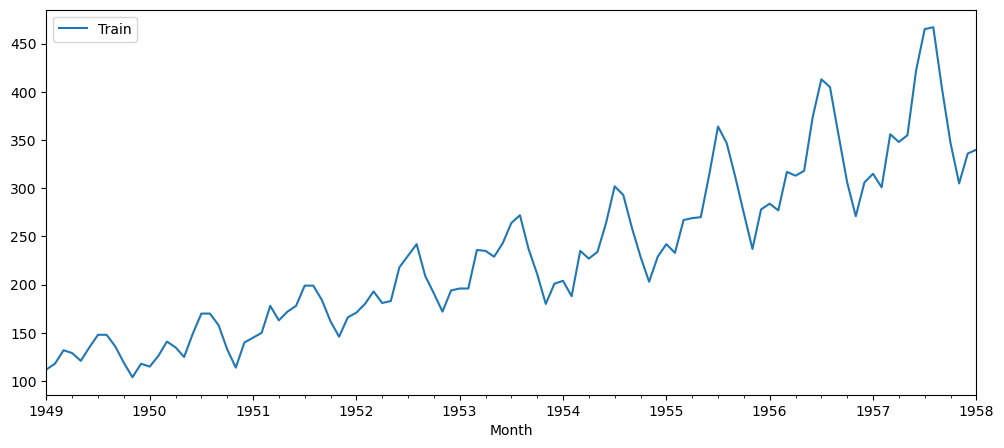

In [16]:
train_data['Thousands of Passengers'].plot(legend=True, label='Train',figsize=(12,5));

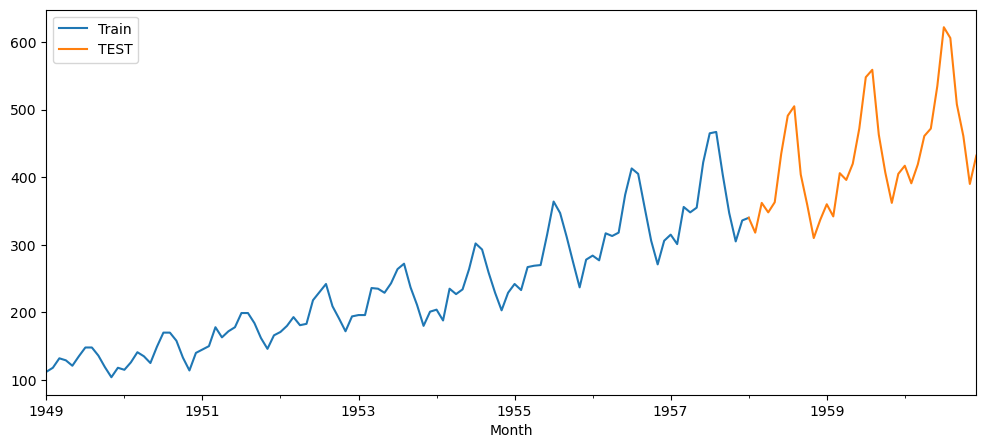

In [17]:
train_data['Thousands of Passengers'].plot(legend=True, label='Train',figsize=(12,5))
test_data['Thousands of Passengers'].plot(legend=True, label='TEST');

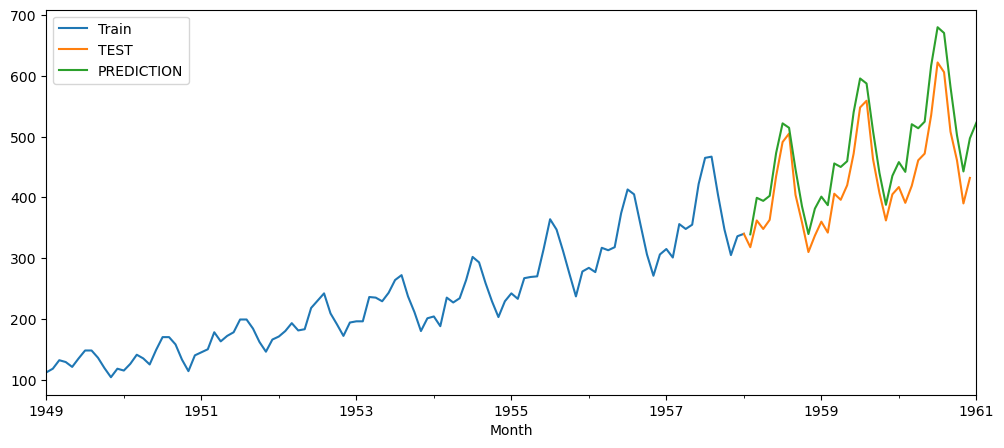

In [18]:
train_data['Thousands of Passengers'].plot(legend=True, label='Train',figsize=(12,5))
test_data['Thousands of Passengers'].plot(legend=True, label='TEST')
test_predictions.plot(legend=True, label='PREDICTION');

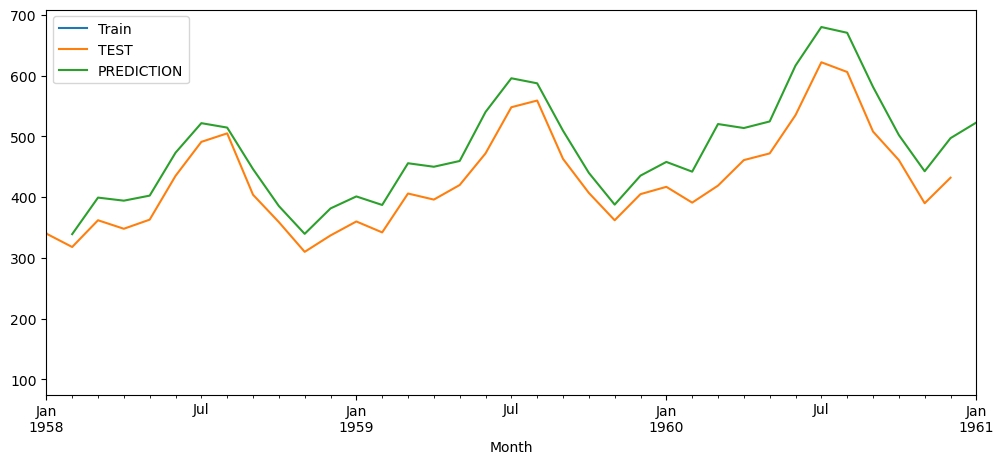

In [19]:
### We can also zoom into the test period.

train_data['Thousands of Passengers'].plot(legend=True, label='Train',figsize=(12,5))
test_data['Thousands of Passengers'].plot(legend=True, label='TEST')
test_predictions.plot(legend=True, label='PREDICTION', xlim=['1958-01-01','1961-01-01']);

### What we observe: Predict seasonal patterns. Over-predict airline passengers.

In [20]:
### Visually, our predictions are better. However, the next question would be how to quantify it.

#### Evaluating Forecast Predictions

We need a metric that is useful for time series forecasting problems. That is a metric designed for continuous values.

The most common evaluation metrics for regression:
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Square Error (RMSE)

When evaluating forecasts, there are two sets of values.
- $y$ - the real values of the test data
- $\hat{y}$ - the predicted value from our forecast


MAE is the average of the absolute value of residuals. However, it will not alert we are off for a few points. We may want to be aware of any prediction errors that are very large (even if there are only a few). The solution would be the MSE. Now units will also be squared, and we lose the interpretability of the errors. Thus, we fix this with RMSE.

'What is the acceptable value for RMSE?' - IT DEPENDS ON THE DATA (scale of the data).

'How do we evaluate a forecast for future dates?' - You can't!


In [21]:
### Let's calculate the risk metric for the airline passenger predictions.

### We can obtain the functions for MSE/MAE from the 'sklearn.metrics' library

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [22]:
mean_absolute_error(y_true=test_data, y_pred=test_predictions)

63.03063477496021

In [23]:
### We can evaluate the metric value by looking at the test data.

test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [24]:
mean_squared_error(y_true=test_data, y_pred=test_predictions)

5614.055004203739

In [25]:
np.sqrt(mean_squared_error(y_true=test_data, y_pred=test_predictions))

74.92699783258195

In [26]:
### We can directly compare RMSE againts the SD of test data. In this case, it is actually lower.

In [27]:
### Let's assume we are satisfied with the model and we want to obtain forecasts for the future dates.

### First, we need to fit the model to the entire data.

final_model = ExponentialSmoothing(df['Thousands of Passengers'],
                                  trend='mul',
                                  seasonal='mul',
                                  seasonal_periods=12).fit()

In [28]:
### Obtain forecasts for 3 years

forecast_predictions = final_model.forecast(36)

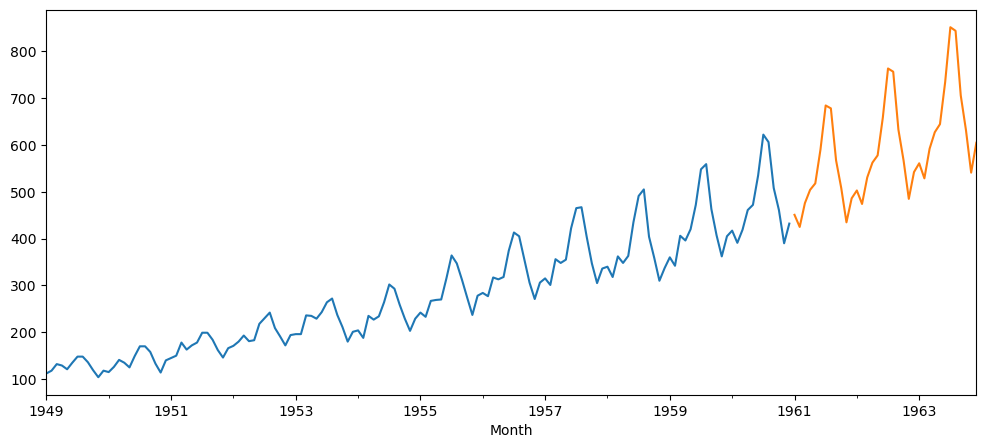

In [29]:
### Plot forecasts with the original data

df['Thousands of Passengers'].plot(figsize=(12,5))
forecast_predictions.plot();

In [30]:
### Predictions looks reasonalble. It continues the trend and predict seasonal changes.

Before moving forward, let's quickly look at two important topics.

- Stationarity: A time series is set to be stationary if it does not exhibit trend or seasonality. That is fluctuation in the data is due to outside forces and noise.


In [31]:
df2 = pd.read_csv('Chapter_6_samples.csv', index_col=0, parse_dates=True)
df2.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


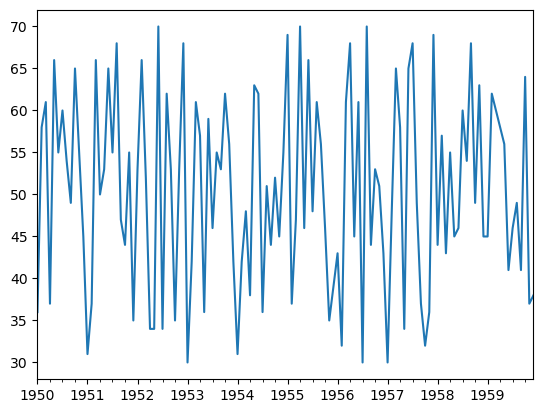

In [32]:
df2['a'].plot();

### This looks pretty stationary (no trend and no seasonality)

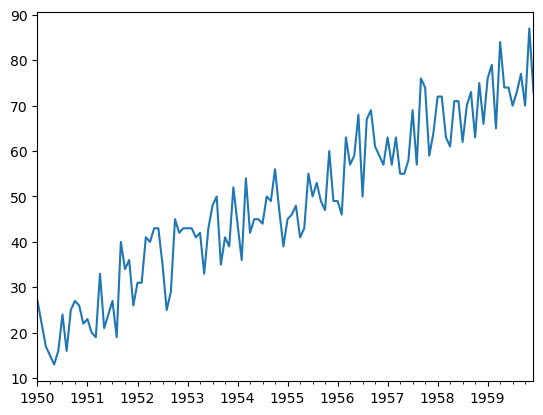

In [33]:
df2['b'].plot();

### It seems there is an upward trend. Thus, NOT a stationary series.

- Differencing

We can make nonstationary data look stationary with 'differencing'.

In differencing, it calculates the difference between consecutive points. statsmodels has a tool for this.

In [34]:
from statsmodels.tsa.statespace.tools import diff

First we calcuate first order differecing: $y_{t}-y_{t-1}$

In [35]:
### Manual calcualation

In [36]:
df2['b'].head()

1950-01-01    27
1950-02-01    22
1950-03-01    17
1950-04-01    15
1950-05-01    13
Name: b, dtype: int64

In [37]:
(df2['b'] - df2['b'].shift(1)).head()

1950-01-01    NaN
1950-02-01   -5.0
1950-03-01   -5.0
1950-04-01   -2.0
1950-05-01   -2.0
Name: b, dtype: float64

In [38]:
### Use 'diff'

In [39]:
diff(df2['b'], k_diff=1).head()

1950-02-01   -5.0
1950-03-01   -5.0
1950-04-01   -2.0
1950-05-01   -2.0
1950-06-01    3.0
Name: b, dtype: float64

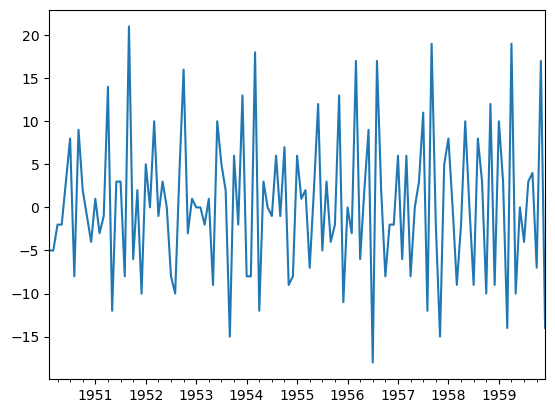

In [40]:
diff(df2['b'], k_diff=1).plot();

### Note: Now data seems to be stationary (NO trend component)

#### AutoCorrelation Function (ACF) and Partial AutoCorrelation Function (PACF) Plots

To understand these plots, we need to understand 'correlation' first. Correlation measures the strength of a linear relationship between two variables. Its values vary from +1 (positive relationship - one increase as the other increases) to -1 (negative relationship). If the value is closer to, it is a weaker relationship (NO relationship).

- Autocorrelation: Correlations of the series with itself, lagged by $x$ time units ($\rho_{x} = Corr(y_{t}, y_{t-x})$). 

- AutoCorrelation Function (ACF) plot: x-axis denotes the lag ($x$) and y-axis denotes the autocorrelation. The correlation decays over time, and for seasonal time series, we may observe seasonal changes (peaks at multiples of the seasonal index).

- Partial AutoCorrelation Function (PACF) plot: We are plotting the relationship between the previous day's residuals versus the real values of the current day. Thus, it only describes the direct relationship between an observation and its lag. It decays very quickly.

These plots help to determine the order of ARIMA-based models.

In [41]:
import statsmodels.api as sm

In [42]:
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols

In [43]:
### Let's import two datasets: stationary dataset and non-stationary dataset

In [44]:
### Non-stationary dataset

df1 = pd.read_csv('Chapter_5_airline_passengers.csv', index_col='Month', parse_dates=True)
df1.index.freq = 'MS' ### We have data at the beginning of the month
df1.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [45]:
df1.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [46]:
### Stationary dataset

df2 = pd.read_csv('Chapter_6_DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)
df2.index.freq = 'D' ### We have daily data
df2.index

DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
               '1959-01-05', '1959-01-06', '1959-01-07', '1959-01-08',
               '1959-01-09', '1959-01-10',
               ...
               '1959-12-22', '1959-12-23', '1959-12-24', '1959-12-25',
               '1959-12-26', '1959-12-27', '1959-12-28', '1959-12-29',
               '1959-12-30', '1959-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq='D')

In [47]:
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


Before moving forward, we add a code to hide warnings. Note this will only hide warnings and this not hide any errors and effecr our models.

In [48]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
### Let's look at an example of calculating ACF

In [50]:
df = pd.DataFrame({'a':[13,5,11,12,9]})
df

,a
0,13
1,5
2,11
3,12
4,9


In [51]:
acf(df['a'])

array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

In [52]:
### Partial autocorrelation estimated with non-recursive yule_walker.

pacf_yw(df['a'], nlags=4, method='mle') ### We have to specify the number of lags and method

array([ 1.        , -0.5       , -0.6       , -0.38541667, -0.40563273])

In [53]:
### Calculate partial autocorrelations via Ordinary Least Squares (OLS).

pacf_ols(df['a'])

array([ 1.        , -0.49677419, -0.43181818])

In [54]:
### Now we can start plotting autocorrelations

In [55]:
from pandas.plotting import lag_plot

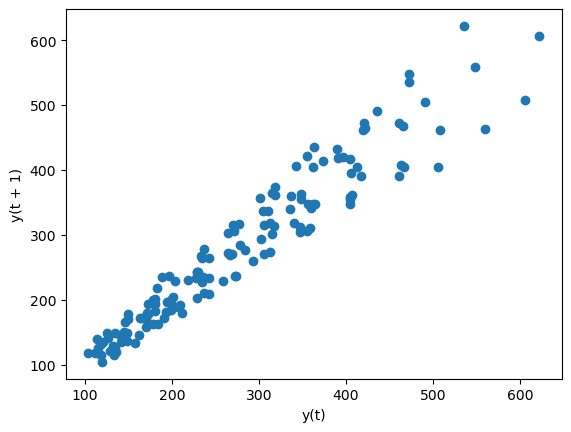

In [56]:
lag_plot(df1['Thousands of Passengers']);

### This indicates very strong autocorrelation.

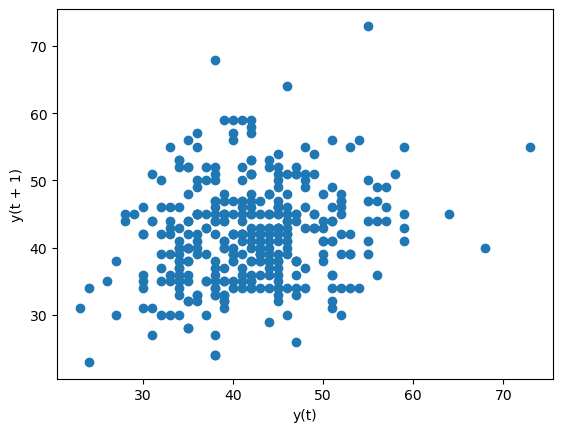

In [57]:
lag_plot(df2['Births']);

### No visible patter. This does not indicate strong autocorrelation.

In [58]:
### Based on the lagged plots, now we can build ACF plots.

In [59]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

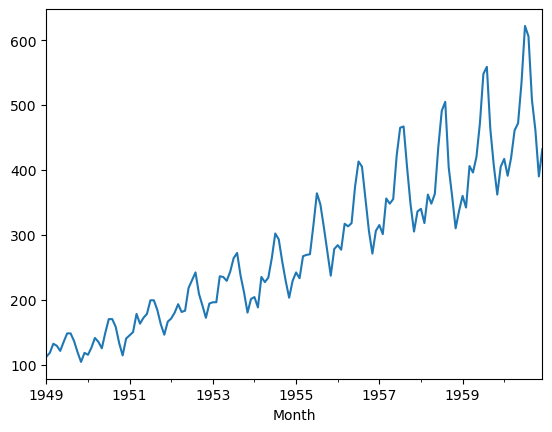

In [60]:
df1['Thousands of Passengers'].plot();

### Seasonal data.

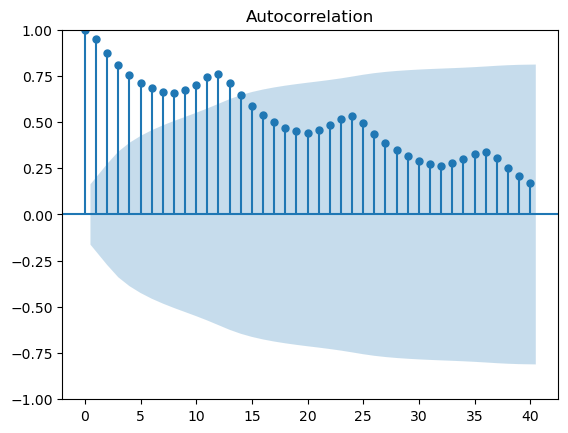

In [61]:
plot_acf(df1['Thousands of Passengers'], lags=40);

### Note the seasonal peaks.

### shaded region represents the 95% confidence interval (CI). Correlation outside this interval is very likely to be correlated.

In [62]:
### Let's see the ACF plot for stationary data.

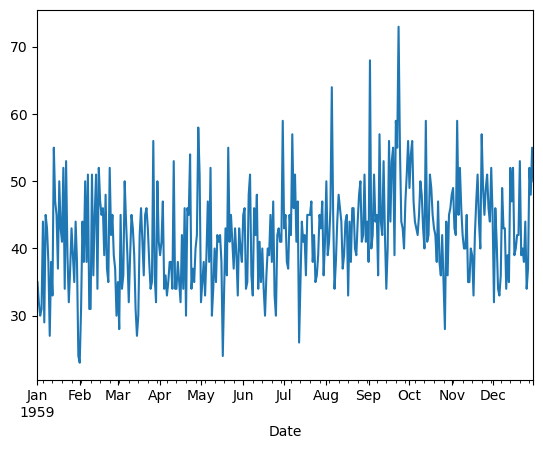

In [63]:
df2['Births'].plot();

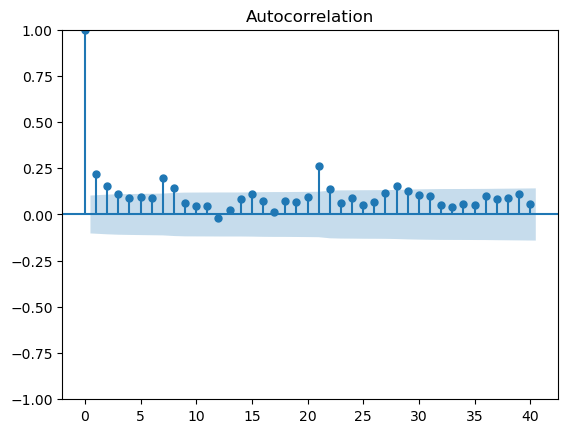

In [64]:
plot_acf(df2['Births'], lags=40);

Now let's check PACF plots. Note that PACF works well with stationary data.

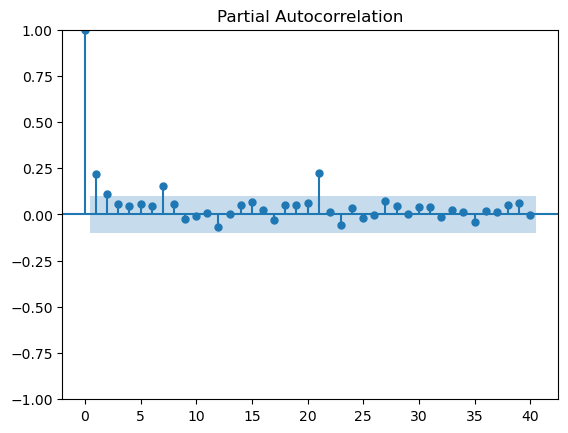

In [65]:
plot_pacf(df2['Births'], lags=40);

We will discuss later how these plots can be used to determine the orders for ARIMA-based models.

#### ARIMA Models

ARIMA stands for AutoRegressive Integrated Moving Average. It has three components: AR (autoregressive), integrated, and MA (moving average).

Note that ARIMA works well in some cases. But, for example, predicting stock prices involves so many external factors, and predicting future prices based on the timestamp alone may not be sufficient. It works well when the data are directly related to the time stamp.

ARIMA is a generalization of the ARMA model.

For seasonal data, we fit seasonal ARIMA (SARIMA) models, and when incorporating exogenous variables, it is called SARIMAX.

The 'Integrated' part of the model is applied to eliminate the non-stationarity. We can do this manually by taking 'differencing'.

Non-seasonal ARIMA models are generally denoted as ARIMA(p,d,q).

- p: Autoregression (A regression model between the current observation and the observation from the previous period)
- d: Integrated (Differencing of observation to make the time series stationary)
- q: Moving Average (A model captures dependence between observations and a residual error from a moving average model applied to lagged observations)

What makes a data set stationary? : A stationary series has constant mean and variance over time. That is, NO trend, and variance is not a function of time. A common test for this is the Dickey-Fuller test.

If we observe that the data is not stationary, then we need to transform it to be stationary. One way to do this is with 'differencing'. For seasonal data, we can difference by a season ($(y_{t}-y_{t-12})$). 

Methods to choose p, d, and q values?

- Method 1: Use ACF and PACF plots. This approach is difficult and less accurate.
- Method 2: Grid Search. Run ARIMA models with different combinations of p,d, and q, and compare models based on an evaluation metric. This is more accurate, but this is computationally expensive.

For seasonal data, we will fit SARIMA, and it is very similar to ARIMA. Here we have another set of parameters (P, D, Q) for the seasonal component.


AutoRegression (AR) Models

In the AR model, we forecast using a linear combination of past values ($p$) of the variable and a stochastic value (error term).

Example: AR(1) model $\rightarrow$ $y_{t} = c + \phi y_{t-1} + \epsilon_{t}$

Note: We can increase the order, but distance values may bring noise to the model as they are not really relevant. 'statsmodels' decides the order for us.


In [66]:
### Import forecasting models

from statsmodels.tsa.ar_model import AutoReg, AutoRegResults

In [67]:
### Import Data - US Population

df = pd.read_csv('Chapter_6_uspopulation.csv', index_col='DATE', parse_dates=True)
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


In [68]:
df.index.freq = 'MS'
df.index

DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
               '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
      

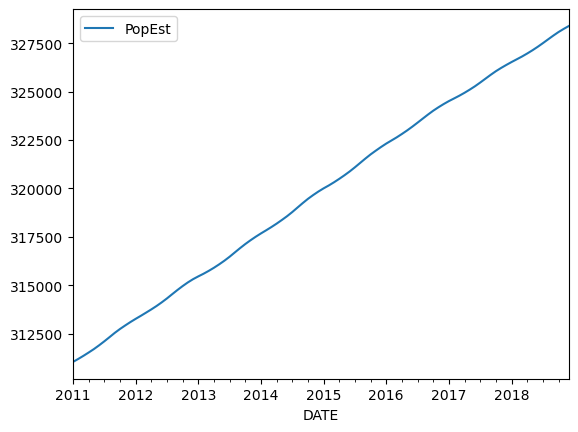

In [69]:
df.plot();

### We can observe a pretty linear trend. So, AR should work nicely here.

In [70]:
len(df)

96

In [71]:
### Split the data into training and testing sets

In [72]:
train = df[:84]
test = df[84:]

In [73]:
### Let's fit a AR(1) model

model = AutoReg(train['PopEst'], lags=1)

In [74]:
AR1fit = model.fit()

In [75]:
### This object contains several information

AR1fit.ar_lags ### Max lag (== lags)

[1]

In [76]:
AR1fit.aic ### AIC value

767.6378091856507

In [77]:
AR1fit.params ### parameter and constant term for the AR(1) model

const        284.913797
PopEst.L1      0.999686
dtype: float64

In [78]:
### Let's obtain forecasts

start = len(train)

end = len(train) + len(test) - 1

In [79]:
start

84

In [80]:
end

95

In [81]:
AR1fit.predict(start = start, end = end) ### Here we give for which index we want to predict (here we are predicting for the test set)

### Note: Here, the function 'predict' works the same as 'forecast' in the Holt-Winters model

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [82]:
### Let's plot both predictions and the observed values together.

predictions1 = AR1fit.predict(start = start, end = end)
predictions1 = predictions1.rename('AR(1) Predictions') ### We are renaming it so that it will appear in the legend when plotting
predictions1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: AR(1) Predictions, dtype: float64

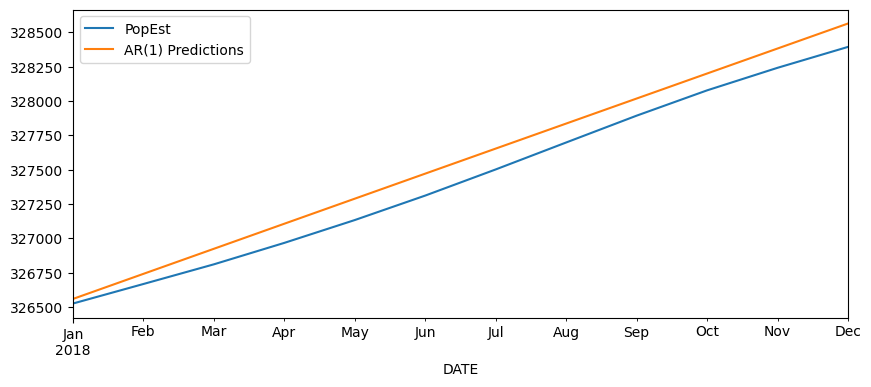

In [83]:
test.plot(figsize=(10,4));
predictions1.plot(legend=True);

### Note: Even with the AR(1) model, predictions are very accurate. However, we can further improve.

In [84]:
AR2fit = AutoReg(train['PopEst'], lags=2).fit()
AR2fit.params

const        137.368305
PopEst.L1      1.853490
PopEst.L2     -0.853836
dtype: float64

In [85]:
predictions2 = AR2fit.predict(start,end)
predictions2 = predictions2.rename('AR(2) Predictions')

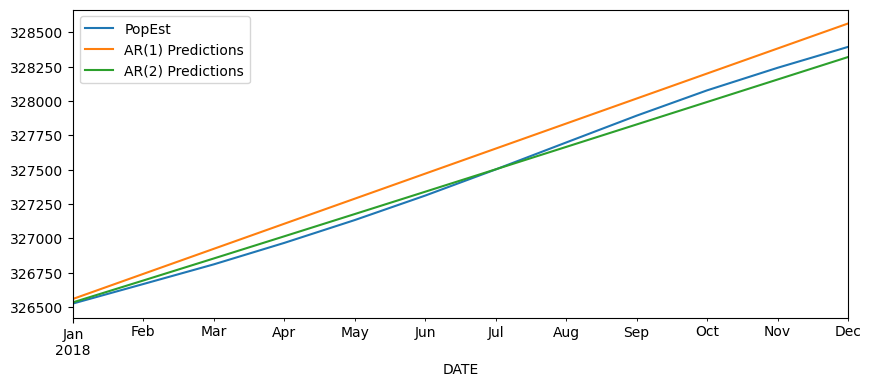

In [86]:
test.plot(figsize=(10,4));
predictions1.plot(legend=True);
predictions2.plot(legend=True);

### Note: AR(2) predictions are much closer to the observed values.

The next question would be how to choose the best order for the data. We let statsmodels figure out the best order for the data.

Note: In older versions, 'AR' is used from 'statsmodels'. However, it has now been updated to 'AutoReg'. 'AR' could automatically determine the optimal order. However, in the new version, we may use 'ar_select_order' if we want statsmodels to determine the optimal order for the data. 
The argument 'ic' is the information criterion for selection, and in the newer versions, we have 'aic', 'hqic', and 'bic' (older versions used to have 't-stat').

In [87]:
from statsmodels.tsa.ar_model import ar_select_order

In [88]:
ARAuto = ar_select_order(train['PopEst'], maxlag=20, ic='aic')
ARAuto.ar_lags

### Note: We have 14 lags

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [89]:
### View parameter values

ARfit = ARAuto.model.fit()
ARfit.params

const         65.705249
PopEst.L1      2.379112
PopEst.L2     -2.146708
PopEst.L3      1.335860
PopEst.L4     -1.156822
PopEst.L5      1.127592
PopEst.L6     -1.162676
PopEst.L7      1.206832
PopEst.L8     -1.022914
PopEst.L9      0.970189
PopEst.L10    -1.184151
PopEst.L11     1.315582
PopEst.L12    -0.636578
PopEst.L13    -0.308903
PopEst.L14     0.283418
dtype: float64

In [90]:
predictions14 = ARfit.predict(start,end)
predictions14 = predictions14.rename('AR(14) Predictions')

In [91]:
### Let's compare predictions with observed values

In [92]:
from sklearn.metrics import mean_squared_error

In [93]:
labels = ['AR1','AR2','AR14']

In [94]:
preds = [predictions1,predictions2,predictions14]
preds

[2018-01-01    326560.403377
 2018-02-01    326742.749463
 2018-03-01    326925.038278
 2018-04-01    327107.269838
 2018-05-01    327289.444162
 2018-06-01    327471.561268
 2018-07-01    327653.621173
 2018-08-01    327835.623896
 2018-09-01    328017.569455
 2018-10-01    328199.457868
 2018-11-01    328381.289152
 2018-12-01    328563.063326
 Freq: MS, Name: AR(1) Predictions, dtype: float64,
 2018-01-01    326535.672503
 2018-02-01    326694.718510
 2018-03-01    326854.882250
 2018-04-01    327015.944948
 2018-05-01    327177.719499
 2018-06-01    327340.045896
 2018-07-01    327502.787330
 2018-08-01    327665.826846
 2018-09-01    327829.064479
 2018-10-01    327992.414808
 2018-11-01    328155.804858
 2018-12-01    328319.172306
 Freq: MS, Name: AR(2) Predictions, dtype: float64,
 2018-01-01    326520.461646
 2018-02-01    326651.254191
 2018-03-01    326783.424611
 2018-04-01    326927.205061
 2018-05-01    327084.129617
 2018-06-01    327254.436062
 2018-07-01    327439.5878

In [95]:
### Compare RMSE for 3 models

for i in range(3):
    error = mean_squared_error(y_true=test['PopEst'], y_pred=preds[i])
    print(f'{labels[i]} MSE was :{error}')

AR1 MSE was :17449.71423587912
AR2 MSE was :2713.258667805521
AR14 MSE was :2766.763770362822


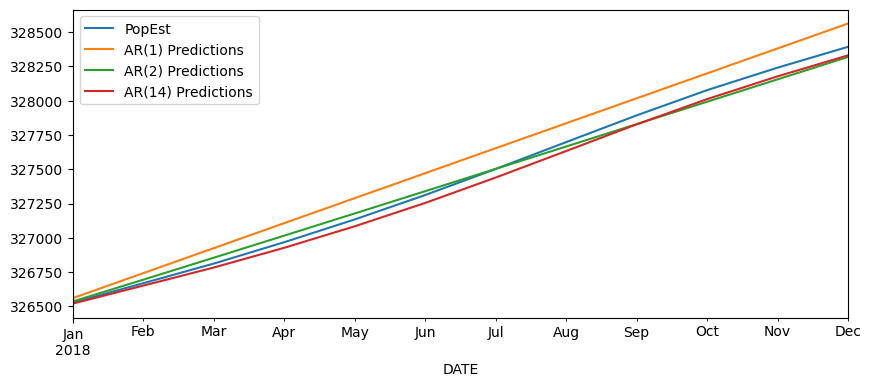

In [96]:
### Plot predictions from 3 models

test.plot(figsize=(10,4));
predictions1.plot(legend=True);
predictions2.plot(legend=True);
predictions14.plot(legend=True);

In [97]:
### Let's try to forecast into the future

### Note that we need to train the model based on the entire dataset

model = AutoReg(df['PopEst'], lags=14)

ARfit = model.fit()

forecast_values = ARfit.predict(start=len(df), end=len(df)+24).rename('Forecasts')
### We predict from the starting point of the data to 24 months into the future

forecast_values

2019-01-01    328539.188692
2019-02-01    328678.495602
2019-03-01    328820.583650
2019-04-01    328973.845547
2019-05-01    329139.375760
2019-06-01    329317.418387
2019-07-01    329505.366852
2019-08-01    329697.866031
2019-09-01    329889.670115
2019-10-01    330071.256043
2019-11-01    330235.083734
2019-12-01    330386.589564
2020-01-01    330530.645774
2020-02-01    330669.197817
2020-03-01    330810.434128
2020-04-01    330961.658589
2020-05-01    331125.752142
2020-06-01    331302.570200
2020-07-01    331488.100599
2020-08-01    331677.201836
2020-09-01    331865.150015
2020-10-01    332043.339696
2020-11-01    332205.494131
2020-12-01    332355.061294
2021-01-01    332496.368668
Freq: MS, Name: Forecasts, dtype: float64

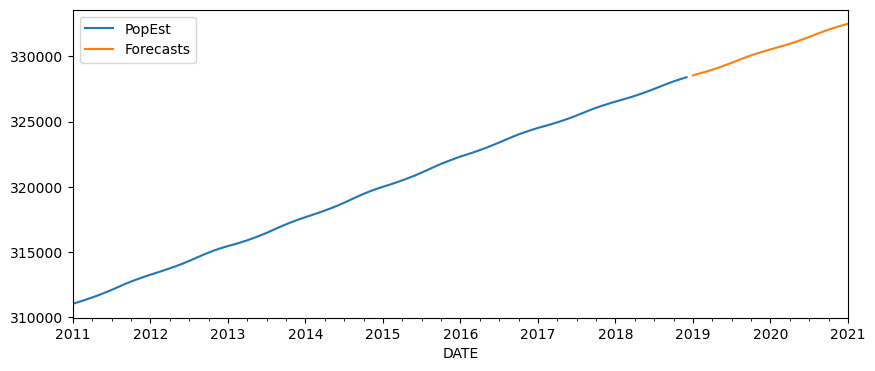

In [98]:
### Now we can plot forecasts with observed values

df['PopEst'].plot(figsize=(10,4), legend=True);
forecast_values.plot(legend=True);

#### Descriptive Statistics and Tests

In the next sections, we will be discussing different models (ARMA and ARIMA). Each model addresses a different type of time series. Thus, in order to select an appropriate model, we need to know some details about the data.

We use built-in tests from "statsmodels" to explore underlying attributes. With these test, we will check:
1. stationarity
2. independent
3. two series demonstrate causality

- Tests for Stationarity: To test stationarity, we use the "augmented Dickey-Fuller test". This will return a p-value for the classic form of hypothesis test. The null hypothesis states that $\phi=1$ (this is called a unit test). If p-value < $\alpha$, we reject the null, and assume data is stationary.

- Granger Causality Tests: This is a hypothesis test to determine if one series is useful in forecasting another. This test might suggest causality. However, it is important to remember that an external factor may be causing this.

- AIC (Akaike Information Criterion): AIC evaluates a collection of models, specifically the quality of a model relative to other models. It penalizes the number of parameters to reduce overfitting.

- BIC (Bayesian Information Criterion): This criterion is similar to AIC, which utilizes a Bayesian approach.

In addition, we can also use seasonality plots to investigate data.

In [99]:
### Here, we use two datasets

### A seasonal dataset
df1 = pd.read_csv('Chapter_5_airline_passengers.csv', index_col='Month', parse_dates=True)
df1.index.freq = 'MS'

### A nonseasonal datset
df2 = pd.read_csv('Chapter_6_DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)
df2.index.freq = 'D'

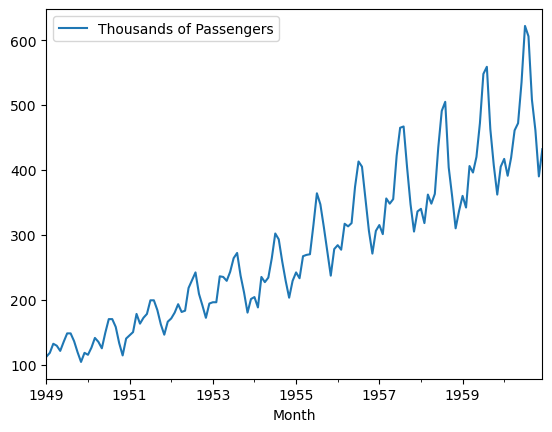

In [100]:
### We start the anlysis with df1

df1.plot();

In [101]:
### Import the augmented Dickey-Fuller test

from statsmodels.tsa.stattools import adfuller

In [102]:
adfuller(df1['Thousands of Passengers']) ### Note: this uses AIC bt default

(0.8153688792060482,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [103]:
### To understand the output, we can try 

# help(adfuller)

In [104]:
### Let's save it with titles so that it will be easy to read the values

dftest = adfuller(df1['Thousands of Passengers'])
dfout = pd.Series(dftest[0:4], index=['ADF Test Statistics','p-value','# Lags Used','# Observations Used'])
dfout

ADF Test Statistics      0.815369
p-value                  0.991880
# Lags Used             13.000000
# Observations Used    130.000000
dtype: float64

In [105]:
for key,val in dftest[4].items():
    dfout[f'critical value ({key})'] = val

dfout

ADF Test Statistics       0.815369
p-value                   0.991880
# Lags Used              13.000000
# Observations Used     130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
dtype: float64

In [106]:
### We make the decision based on the p-value

### For this purpose, we have a function to carry out the test and return the results

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, and returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [107]:
adf_test(df1['Thousands of Passengers'])

Augmented Dickey-Fuller Test: 
ADF test statistic        0.815369
p-value                   0.991880
# lags used              13.000000
# observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


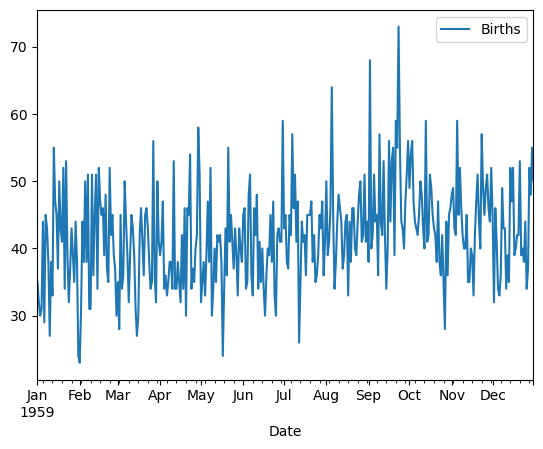

In [108]:
### Now let's try this on the second dataset

df2.plot();

### It is a bit hard to see whether it is stationary or not

In [109]:
adf_test(df2['Births'])

### p-value is pretty small. not unit root. Thus, it is stationary.

Augmented Dickey-Fuller Test: 
ADF test statistic       -4.808291
p-value                   0.000052
# lags used               6.000000
# observations          358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [110]:
### Now we check the Granger Causality Test

### Fo this purpose, we import a new dataset

df3 = pd.read_csv('Chapter_6_samples.csv', index_col=0, parse_dates=True)
df.index.freq = 'MS'
df3.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


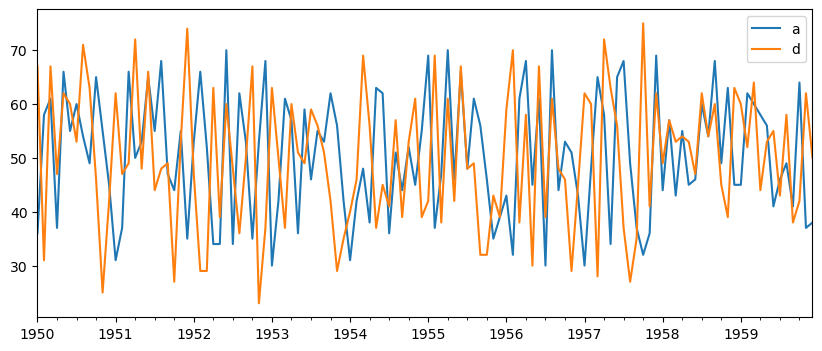

In [111]:
df3[['a','d']].plot(figsize=(10,4));

### It is hard to the relationship between the series. However, if we consider lags of one series it will nicely allign with the other series.

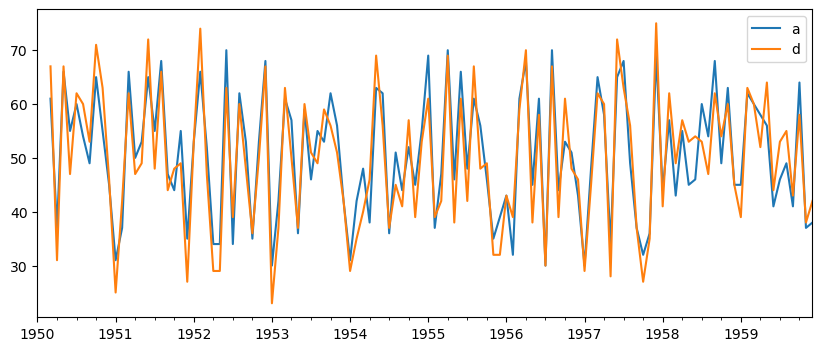

In [112]:
df3['a'].iloc[2:].plot(figsize=(10,4), legend=True);
df3['d'].shift(2).plot(legend=True); ### Shift data by two time points

### Note that the series now aligns nicely. Thus, some causality between these two series.

In [113]:
### Let's use the Granger Causality test for this to quantify the dependence.

### First, we need to import the test

from statsmodels.tsa.stattools import grangercausalitytests

In [114]:
grangercausalitytests(df3[['a','d']], maxlag=3); ### We observed above that with lag 2 series align nicely. Thus, set max lag as 3.

### More lags give a higher chance of identifying causality with long-term lags

### Note that for lag 2 and lag 3, p-values are zero, indicating causality (not for lag 1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


In [115]:
### Let's investigate this for two series where there is no causality.

grangercausalitytests(df3[['b','d']], maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.5619  , p=0.2114  , df=1
likelihood ratio test: chi2=1.5517  , p=0.2129  , df=1
parameter F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=0.9086  , p=0.6349  , df=2
likelihood ratio test: chi2=0.9051  , p=0.6360  , df=2
parameter F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=1.7018  , p=0.6365  , df=3
likelihood ratio test: chi2=1.6895  , p=0.6393  , df=3
parameter F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3


Before moving forward let's do a quick review on calculating forecast accuracy. We did this before using MAE, MSE, and RMSE.

In [116]:
np.random.seed(42)

df = pd.DataFrame(np.random.randint(20,30,(50,2)), columns=['test','Predictions'])
df.head()

,test,Predictions
0,26,23
1,27,24
2,26,29
3,22,26
4,27,24


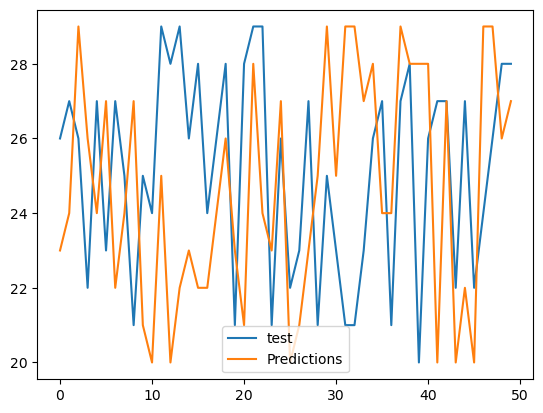

In [117]:
df.plot();

In [118]:
### Previously we import the risk metrics from sklearn. Since these are popular, they are also avaiable in statsmodel.

from statsmodels.tools.eval_measures import mse, rmse, meanabs

In [119]:
mse(df['test'],df['Predictions'])

17.02

In [120]:
rmse(df['test'],df['Predictions'])

4.125530268947253

In [121]:
meanabs(df['test'],df['Predictions'])

3.54

Now we obtain some seasonality plots. We can use statsmodels to obtain seasonal plots.

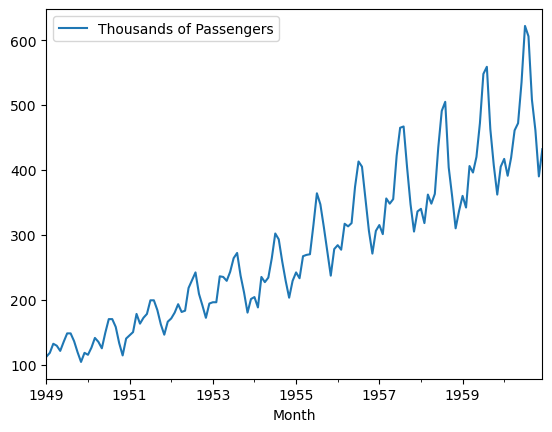

In [122]:
df = pd.read_csv('Chapter_5_airline_passengers.csv', index_col='Month', parse_dates=True)
df.index.freq = 'MS'
df.plot();

### It is hard to determine when the seasonality will happen (summer?)

In [123]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

### These funtions will seperate data to months and quarters

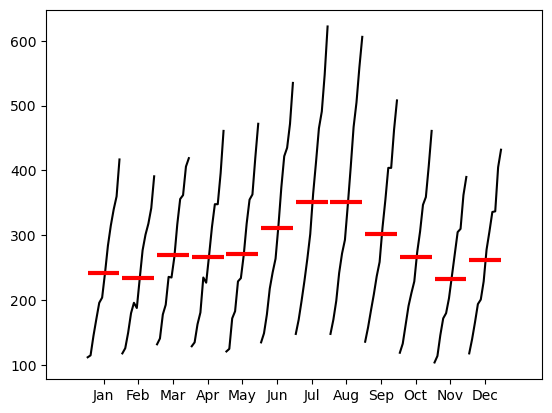

In [124]:
month_plot(df['Thousands of Passengers']);

### Note: The Original data are monthly data. Thus, we can directly call the function "month_plot"

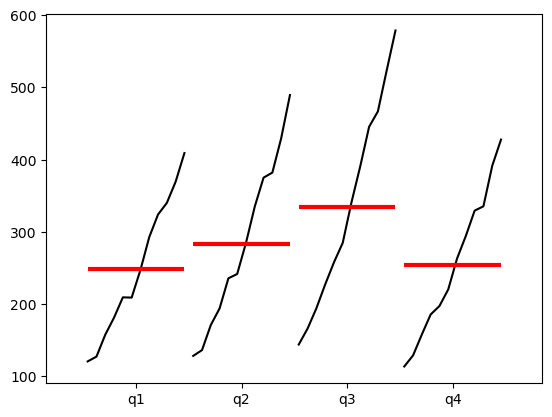

In [125]:
### For quarterly data, we need to resample the data first.

dfq = df['Thousands of Passengers'].resample(rule='Q').mean()

quarter_plot(dfq);

####  ARIMA Model

Remember that it has components.
1. AR - AutoRegression (regressed on its own lags. We have to decide how many lags we need to consider)
2. I - Integrated (order of differencing)
3. MA - Moving Average (regression error term is a linear combination of error terms)

Nonseasonal ARIMA is denoted as ARIMA(p,d,q). In order to write it mathematically, we can start with the ARMA model, then consider differencing to attain stationarity. 

Now let's see how to choose p, d, and q parameter values. Later, we will investigate how to choose P, D, and Q (for seasonal models). Note that it is not required to have some value for each parameter. Depending on the data, some parameters may take the value zero.


Choosing parameters with ACF plots:

- If the ACF plot shows "positive" autocorrelations at the first lag, then it suggests using the "AR" terms.
- IF the ACF plot shows "negative" autocorrelations at the first lag, then it suggests using the "MA" terms.

Choosing parameters with PACF plots:

- If there is a sharp drop after lag "k", then it suggests an AR(k) model.
- If there is a gradual decline, then it suggests an MA model.

Identification of an AR model is often best done with the PACF.

Identification of an MA model is often best done with the ACF.

Note: Often, it is difficult to read these values from the plot. Thus, it is efficient to perform a grid search across various combinations of p, d, and q values.

For grid search, we will be using the "pmdarima" (Pyramid ARIMA) library. It is a separate library. However, it uses the statsmodels background. The pmdarima library uses AIC as a metric to compare the performance of various ARIMA-based models. 


In [126]:
### Here, we use two datasets

### A seasonal dataset
df1 = pd.read_csv('Chapter_5_airline_passengers.csv', index_col='Month', parse_dates=True)
df1.index.freq = 'MS'

### A nonseasonal datset
df2 = pd.read_csv('Chapter_6_DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)
df2.index.freq = 'D'

In [127]:
### Since this is the first time we are using pmdarima, we may need to install it in our environment.

# !pip install pmdarima


> 💡 **Note**
>
> If you encounter an import error, it may be due to incompatible library versions.  
> Fix it by ensuring that **NumPy** and **pmdarima** versions match, and that you install packages inside the same environment your notebook kernel uses.
>
> **Check the environment and NumPy version:**
> ```python
> import sys, numpy
> print(sys.executable)
> print("numpy:", numpy.__version__)
> ```
>
> **Then run (in a notebook cell):**
> ```python
> %pip install --upgrade pip
> %pip uninstall -y pmdarima
> %pip install "numpy<2" "pmdarima<3"
> ```
>
> After installation, **restart the kernel** and test:
> ```python
> from pmdarima import auto_arima
> ```


In [128]:
### Import auto_arima

from pmdarima import auto_arima

### note that "auto_arima" has several attributes. There, we can set starting values for parameters. Try the help command below.

# help(auto_arima)

In [129]:
stepwise_fit = auto_arima(df2['Births'], start_p=0, start_q=0, max_p=6, max_q=3, seasonal=False, trace=True)

### "trace = True" will show first couple of models auto_arima tries to fit.

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2650.760, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2565.234, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2463.584, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2648.768, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2460.154, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2461.271, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2460.722, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2536.154, Time=0.12 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2463.066, Time=1.38 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2459.074, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2462.221, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2563.261, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2460.367, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

In [130]:
### Instead of manually checking AIC, we can use summary to show the details of the best model.

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1226.537
Date:                Thu, 06 Nov 2025   AIC                           2459.074
Time:                        17:29:39   BIC                           2470.766
Sample:                    01-01-1959   HQIC                          2463.721
                         - 12-31-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1252      0.060      2.097      0.036       0.008       0.242
ma.L1         -0.9624      0.017    -56.429      0.000      -0.996      -0.929
sigma2        49.1512      3.250     15.122      0.000      42.781      55.522
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                25.33
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.57
Prob(H) (two-sided):                  0.81   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [131]:
### let's check the model for airline passengers.

stepwise_fit = auto_arima(df1['Thousands of Passengers'], start_p=0, start_q=0, max_p=4, max_q=4, 
                          seasonal=True, trace=True, m=12) 

### Since "seasonal=True", we may choose seasonal periods. As these are monthly data, m = 12.

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.19 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.17 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.58 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.37 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.43 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.29 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.58 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.55 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.26 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.13 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=2.77 sec
 ARIMA(0,1,1)(1,1,1)[12]     

In [132]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Thu, 06 Nov 2025   AIC                           1019.178
Time:                                     17:29:49   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Note: In the statsmodels library, there are functions called "arma_order_select_ic" and "arima_select_order". It performs similarly to "auto_arima".
However, their output may not be that informative/look nice. 

In [133]:
### Now we will investigate ARMA and ARIMA models.

### First, we will load forecasting tools 

from statsmodels.tsa.arima.model import ARIMA, ARIMAResults

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf ### This helps to see p and q order

### However, it is easier to do a grid search than investigating ACF and PACF plots
from pmdarima import auto_arima


In [134]:
### Load dataset 1

df1 = pd.read_csv('Chapter_6_DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)
df1.index.freq = 'D'

### Use the first 4 months of data

df1 = df1[:120]

In [135]:
### Load dataset 2

df2 = pd.read_csv('Chapter_6_TradeInventories.csv', index_col='Date', parse_dates=True)
df2.index.freq = 'MS'
df2.head()


,Inventories
Date,
1997-01-01,1301161
1997-02-01,1307080
1997-03-01,1303978
1997-04-01,1319740
1997-05-01,1327294


ARMA Model

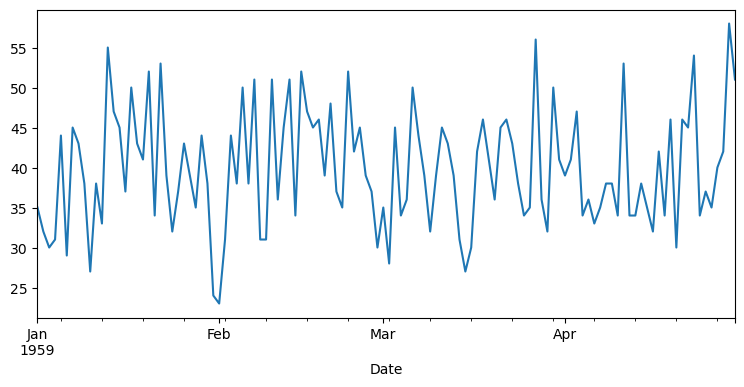

In [136]:
df1['Births'].plot(figsize=(9,4));

### Looks nonstationary. Thus, ARMA models would work here.

In [137]:
### Confirm stationarity (with our hand written function, "adf_test")

adf_test(df1['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -9.855384e+00
p-value                 4.373545e-17
# lags used             0.000000e+00
# observations          1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [138]:
auto_arima(df1['Births'], seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                        SARIMAX   Log Likelihood                -409.745
Date:                Thu, 06 Nov 2025   AIC                            823.489
Time:                        17:29:51   BIC                            829.064
Sample:                    01-01-1959   HQIC                           825.753
                         - 04-30-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.7833      0.687     57.896      0.000      38.437      41.130
sigma2        54.1197      8.319      6.506      0.000      37.815      70.424
===================================================================================
Ljung-Box (L1) (Q):                   0.85   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.36   Prob(JB):                         0.26
Heteroskedasticity (H):               0.80   Skew:                             0.26
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [139]:
### Create a training and testing tests

### Forecast 1 month (that is, 25% for testing)

train = df1.iloc[:90]
test = df1.iloc[90:]

In [140]:
### Let's assume p = 2 and q = 2

model = ARIMA(train['Births'], order=(2,0,2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -307.812
Date:                Thu, 06 Nov 2025   AIC                            627.625
Time:                        17:29:51   BIC                            642.624
Sample:                    01-01-1959   HQIC                           633.673
                         - 03-31-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.7565      1.017     39.091      0.000      37.763      41.750
ar.L1         -0.4656      1.003     -0.464      0.643      -2.432       1.500
ar.L2          0.5084      0.940      0.541      0.589      -1.334       2.351
ma.L1          0.5617     15.358      0.037      0.971     -29.539      30.663
ma.L2         -0.4382      6.629     -0.066      0.947     -13.431      12.555
sigma2        54.3764    818.429      0.066      0.947   -1549.715    1658.468
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.00
Prob(Q):                              0.96   Prob(JB):                         0.37
Heteroskedasticity (H):               0.92   Skew:                             0.16
Prob(H) (two-sided):                  0.83   Kurtosis:                         2.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [141]:
### Obtain forecasts

start = len(train)
end = len(train) + len(test) - 1

In [142]:
predictions = results.predict(start, end).rename('ARMA (2,2) Predictions')
predictions.head()

1959-04-01    40.534216
1959-04-02    39.548938
1959-04-03    40.248549
1959-04-04    39.421880
1959-04-05    40.162472
Freq: D, Name: ARMA (2,2) Predictions, dtype: float64

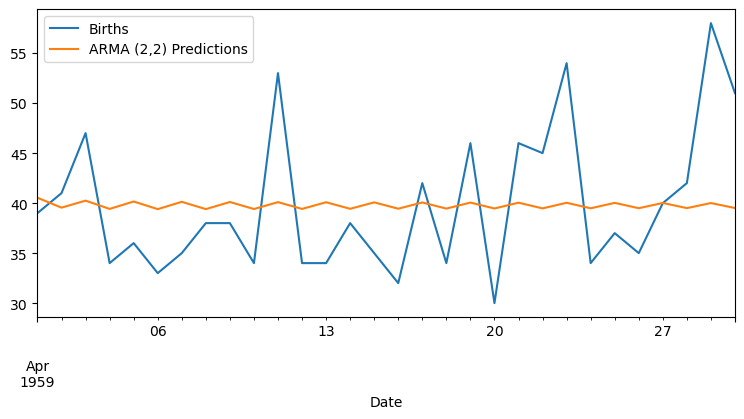

In [143]:
test['Births'].plot(figsize=(9,4), legend=True)
predictions.plot(legend=True);

Since we assume ARMA(2,2), predictions should be closer to the mean (no trend and no seasonality)

In [144]:
test.mean()

Births    39.833333
dtype: float64

In [145]:
predictions.mean()

39.78490254769885

ARIMA Model

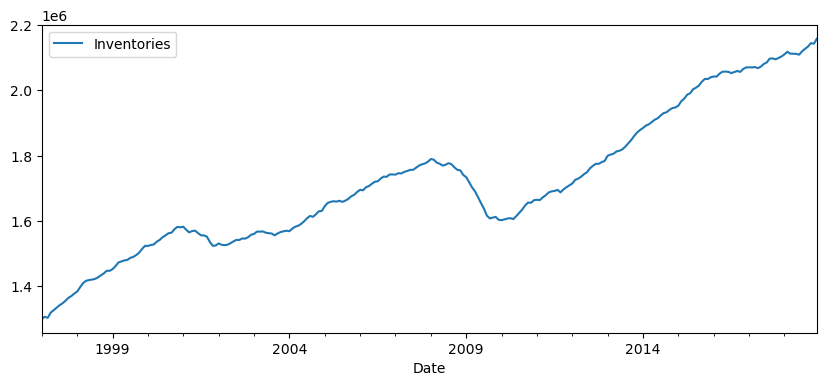

In [146]:
df2.plot(figsize=(10,4));

In [147]:
from statsmodels.tsa.seasonal import seasonal_decompose

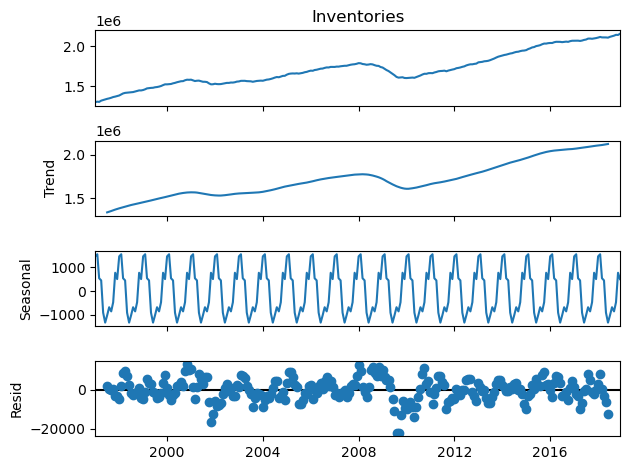

In [148]:
results = seasonal_decompose(df2['Inventories'], model='add') ### Additive model
results.plot();

### Note that we have a seasonal component

In [149]:
auto_arima(df2['Inventories'], seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Thu, 06 Nov 2025   AIC                           5348.037
Time:                        17:29:53   BIC                           5355.181
Sample:                    01-01-1997   HQIC                          5350.908
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                  82.61   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [150]:
### let's assume p=1, d=1, and q=1

### In order to take differencing let's import "diff"

from statsmodels.tsa.statespace.tools import diff

In [151]:
df2['Diff_1'] = diff(df2['Inventories'], k_diff=1)

In [152]:
adf_test(df2['Diff_1'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -3.412249
p-value                   0.010548
# lags used               4.000000
# observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


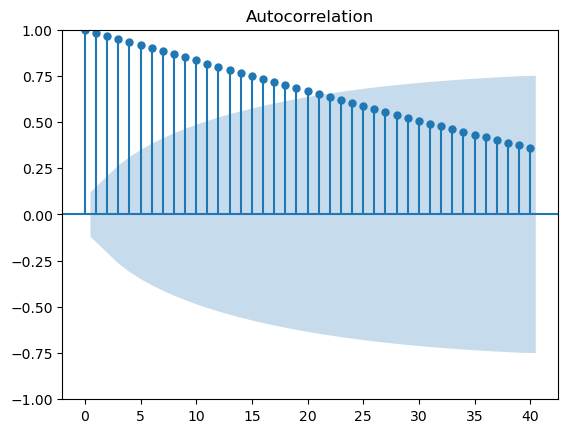

In [153]:
### Let's check with ACF and PACF plots

plot_acf(df2['Inventories'],lags=40);

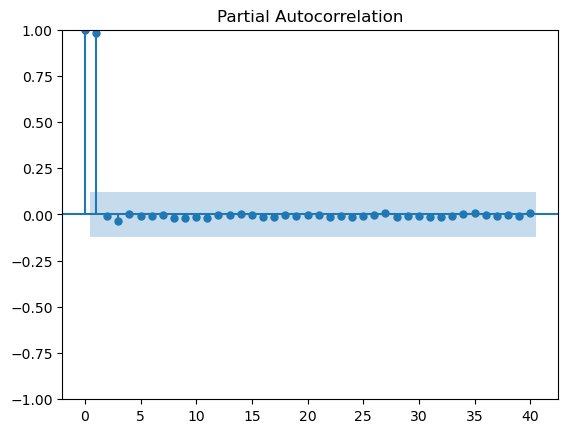

In [154]:
plot_pacf(df2['Inventories'],lags=40);

In the PACF plot, there is a significant drop. Thus, add the AR term. 
The corresponding lag where there is a significant drop is 1. Thus, it is AR(1)

Based on classical methods, the MA parameter would be 0 or 1. We check which value it should take.

In [155]:
stepwise_fit = auto_arima(df2['Inventories'],
                         start_p=0, start_q=0, max_p=2, max_q=2,
                         seasonal=False, trace=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5348.037, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5399.843, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5350.241, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5409.217, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5378.835, Time=0.15 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.283 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Thu, 06 Nov 2025   AIC                           5348.037
Time:                        17:29:54   BIC                           5355.181
Sample:                    01-01-1997   HQIC                          5350.908
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                  82.61   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [156]:
### Note: Let's assume the best model it has suggested is ARIMA(1,1,1)

### Now we will test this with training and testing sets

len(df2)

264

In [157]:
train = df2.iloc[:252]
test = df2.iloc[252:]

In [158]:
model = ARIMA(train['Inventories'], order=(1,1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Inventories   No. Observations:                  252
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2561.268
Date:                Thu, 06 Nov 2025   AIC                           5128.535
Time:                        17:29:55   BIC                           5139.112
Sample:                    01-01-1997   HQIC                          5132.791
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.001    845.968      0.000       0.998       1.002
ma.L1         -0.9998      0.019    -52.782      0.000      -1.037      -0.963
sigma2      2.654e+07    3.1e-11   8.56e+17      0.000    2.65e+07    2.65e+07
===================================================================================
Ljung-Box (L1) (Q):                  87.24   Jarque-Bera (JB):                98.76
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                            -1.17
Prob(H) (two-sided):                  0.15   Kurtosis:                         4.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.62e+33. Standard errors may be unstable.
"""

In [159]:
start = len(train)
end = len(train) + len(test) - 1

predictions = results.predict(start = start, end = end, typ='levels').rename('ARIMA (1,1,1) Predictions')
predictions.head()

### Note: Without typ='levels', the model will predict with the different series (Diff_1)

2018-01-01    2.107099e+06
2018-02-01    2.110447e+06
2018-03-01    2.113795e+06
2018-04-01    2.117143e+06
2018-05-01    2.120491e+06
Freq: MS, Name: ARIMA (1,1,1) Predictions, dtype: float64

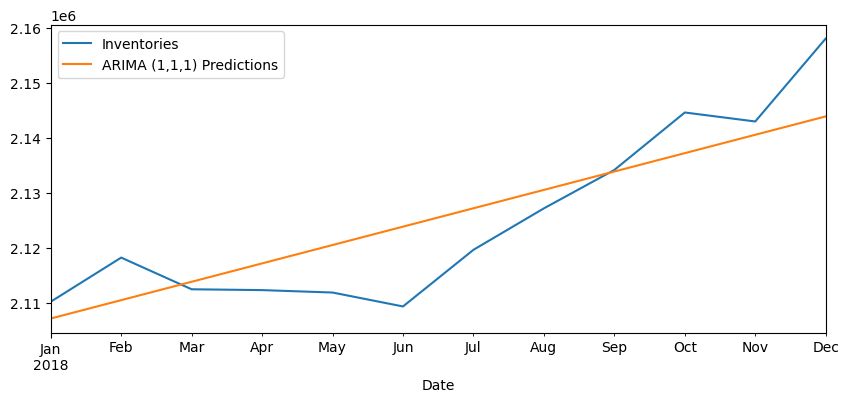

In [160]:
test['Inventories'].plot(figsize=(10,4),legend=True);
predictions.plot(legend=True);

### Since we ignore the seasonality, it captures the general trend.

In [161]:
### Check forecast accuracy

from statsmodels.tools.eval_measures import rmse

In [162]:
error = rmse(test['Inventories'], predictions)
error

7703.613634347877

In [163]:
### We can compare the RMSE (scale) against the test mean

test['Inventories'].mean()

2125075.6666666665

In [164]:
predictions.mean()

2125512.5464018504

In [165]:
### Forecast into the unknown future

In [166]:
### Train the model with the entire dataset

model = ARIMA(df2['Inventories'], order=(1,1,1))
results = model.fit()
forecasts = results.predict(start=len(df2), end=len(df2)+11, typ='levels').rename('ARIMA(1,1,1) Forecasts')

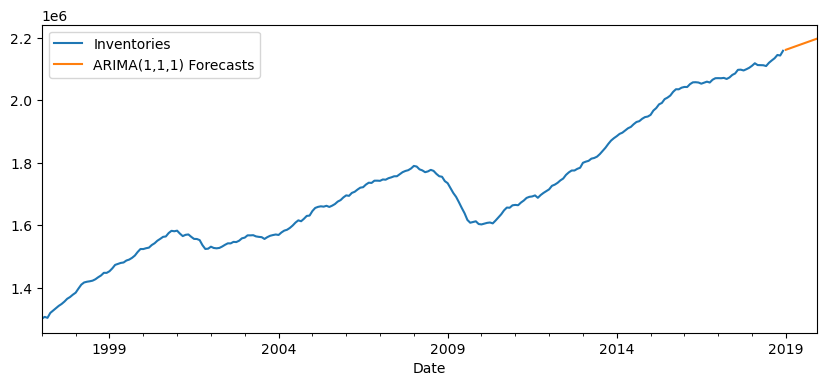

In [167]:
df2['Inventories'].plot(figsize=(10,4), legend=True);
forecasts.plot(legend=True);

### SARIMA (Seasonal ARIMA) Model 

Here we have an additional set of parameters (P, D, Q, and m). They represent seasonal regression, differencing, moving average, and seasonal period.

We implement this with statsmodels, and it is called "SARIMAX". "X" stands for exogenous regressor variables (we will check this later).

In [168]:
### Let's load a couple of forecasting tools

from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.tsa.seasonal import seasonal_decompose

from pmdarima import auto_arima

In [169]:
### Import the data

### Note that this dataset is slightly different (month and year are separated).

df = pd.read_csv('Chapter_6_co2_mm_mlo.csv')
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [170]:
### Using the given data, we can create a date column.

### We add a dictionary ({}) for the year and also for the month

df['date'] = pd.to_datetime({'year':df['year'],'month':df['month'], 'day':1})
df.head()

### Alternative: Directly pass it to the dictionary function
### dict(year=df['year'], month=df['month'], day=1)

,year,month,decimal_date,average,interpolated,date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [171]:
df.info() ### Confirms "date" is a datetime object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          729 non-null    int64         
 1   month         729 non-null    int64         
 2   decimal_date  729 non-null    float64       
 3   average       722 non-null    float64       
 4   interpolated  729 non-null    float64       
 5   date          729 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 34.3 KB


In [172]:
df = df.set_index('date')
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


In [173]:
df.index.freq = 'MS'
df.index

DatetimeIndex(['1958-03-01', '1958-04-01', '1958-05-01', '1958-06-01',
               '1958-07-01', '1958-08-01', '1958-09-01', '1958-10-01',
               '1958-11-01', '1958-12-01',
               ...
               '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01',
               '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01',
               '2018-10-01', '2018-11-01'],
              dtype='datetime64[ns]', name='date', length=729, freq='MS')

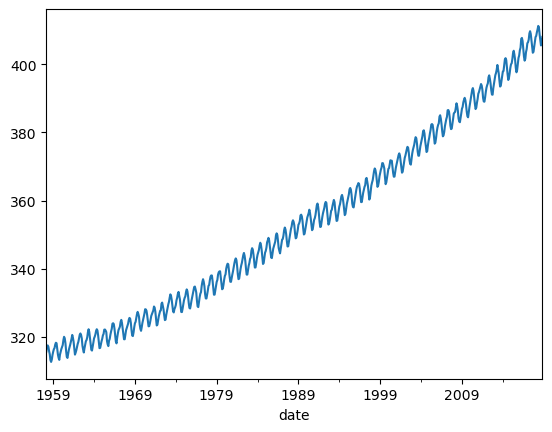

In [174]:
### Let's first plot data. Since the 'average' column has some missing values, we will use the "interpolated" column.

df['interpolated'].plot();

### There is a clear trend and seasonality.

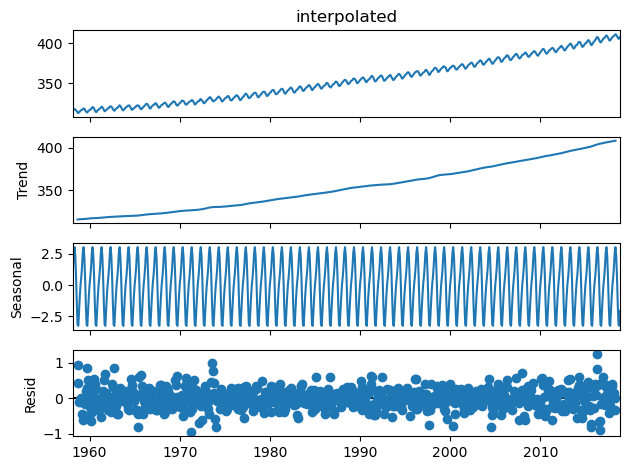

In [175]:
result = seasonal_decompose(df['interpolated'], model='add')
result.plot();

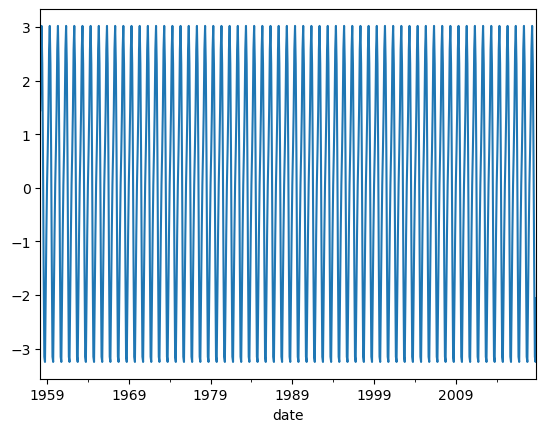

In [176]:
### Note: If you are not sure about the seasonal period, we can obatin the seasonal plot and see how many peaks are there.

result.seasonal.plot();

In [177]:
### Let's fit auto_arima to obtain the order

auto_arima(df['interpolated'], seasonal=True, m=12).summary()

### Note: This may take some time to run.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  729
Model:             SARIMAX(0, 1, 3)x(1, 0, [1], 12)   Log Likelihood                -205.691
Date:                              Thu, 06 Nov 2025   AIC                            423.383
Time:                                      17:33:13   BIC                            450.924
Sample:                                  03-01-1958   HQIC                           434.010
                                       - 11-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3565      0.036     -9.798      0.000      -0.428      -0.285
ma.L2         -0.0221      0.037     -0.590      0.555      -0.095       0.051
ma.L3         -0.0859      0.036     -2.381      0.017      -0.157      -0.015
ar.S.L12       0.9996      0.000   3027.280      0.000       0.999       1.000
ma.S.L12      -0.8661      0.021    -40.731      0.000      -0.908      -0.824
sigma2         0.0955      0.005     20.354      0.000       0.086       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 4.02
Prob(Q):                              0.80   Prob(JB):                         0.13
Heteroskedasticity (H):               1.13   Skew:                             0.00
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [178]:
### Let's forecast into the future.

### First, we will forecast/predict for one year (12 months)

### Train and test datasets

len(df)

729

In [179]:
train = df.iloc[:717]
test = df.iloc[717:]

In [180]:
model = SARIMAX(train['interpolated'], order=(0,1,3), seasonal_order=(1,0,1,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                         interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 3)x(1, 0, [1], 12)   Log Likelihood                -201.191
Date:                              Thu, 06 Nov 2025   AIC                            414.382
Time:                                      17:33:14   BIC                            441.824
Sample:                                  03-01-1958   HQIC                           424.979
                                       - 11-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3544      0.036     -9.734      0.000      -0.426      -0.283
ma.L2         -0.0250      0.037     -0.670      0.503      -0.098       0.048
ma.L3         -0.0864      0.036     -2.432      0.015      -0.156      -0.017
ar.S.L12       0.9996      0.000   2942.611      0.000       0.999       1.000
ma.S.L12      -0.8655      0.023    -38.013      0.000      -0.910      -0.821
sigma2         0.0953      0.005     20.256      0.000       0.086       0.104
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 4.32
Prob(Q):                              0.78   Prob(JB):                         0.12
Heteroskedasticity (H):               1.15   Skew:                             0.02
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [181]:
### Train and test data

start = len(train)
end = len(train) + len(test) - 1

In [182]:
predictions = results.predict(start, end, typ='levels').rename('SARIMA Predictions')

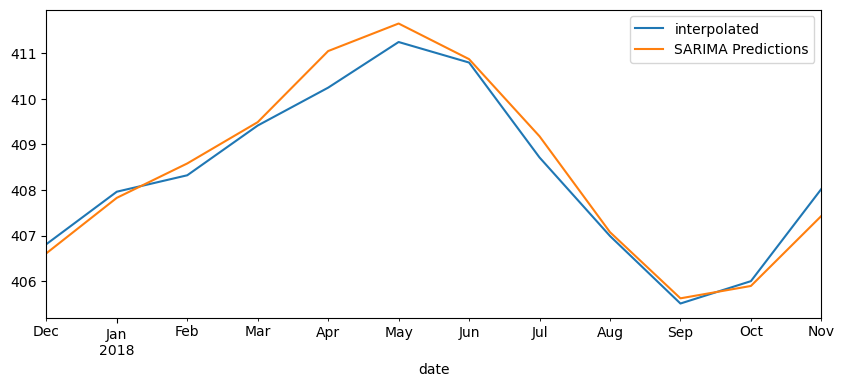

In [183]:
test['interpolated'].plot(figsize=(10,4), legend=True)
predictions.plot(legend=True);

### Predictions look very close to the observed values during the testing period.

In [184]:
### Forecast accuracy

rmse(test['interpolated'], predictions)

0.35817371809816045

In [185]:
test['interpolated'].mean()

### In this scale, RMSE is pretty small.

408.3333333333333

In [186]:
### Noew we forecast into the future

In [187]:
model = SARIMAX(df['interpolated'], order=(0,1,3), seasonal_order=(1,0,1,12))
results = model.fit()
forecasts = results.predict(len(df), len(df)+11, typ='levels').rename('SARIMA Forecasts')

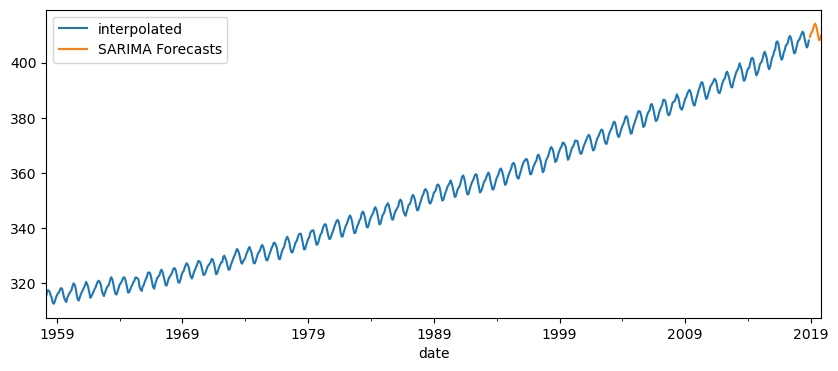

In [188]:
df['interpolated'].plot(figsize=(10,4), legend=True);
forecasts.plot(legend=True);

####  SARIMAX Model

Remember that "X" refers to exogenous regressor variables. 

Example: We are trying to forecast the number of restaurant visitors using historical data. We may try the SARIMA model and use historical lagged values to predict future visitor numbers. What if we had some other features we want to incorporate (eg, holiday effect)? We can incorporate this as a binary variable into the model (holiday - YES/NO).

We need to convert some of these string-type variables to numerical variables. There are a few ways to do this (one-hot encoding, dummy variables).
This can be easily done with pandas with the "pd.get_dummies()" command.


In [189]:
### Import Data (Restaurant Visitors)

df = pd.read_csv('Chapter_6_RestaurantVisitors.csv')
df.head()

,date,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
0,1/1/2016,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
1,1/2/2016,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2,1/3/2016,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
3,1/4/2016,Monday,0,na,23.0,18.0,32.0,32.0,105.0
4,1/5/2016,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [190]:
df = pd.read_csv('Chapter_6_RestaurantVisitors.csv', index_col='date', parse_dates=True)
df.index.freq = 'D'
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [191]:
df.tail()

### Note: There are some missing data.

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [192]:
df1 = df.dropna()
df1.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


In [193]:
### Note that values of last 4 columns are 'floats'. It would be better if they are integers.

df1.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [194]:
cols = ['rest1', 'rest2', 'rest3', 'rest4', 'total']

for column in cols:
    df1[column] = df1[column].astype(int)

df1.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98


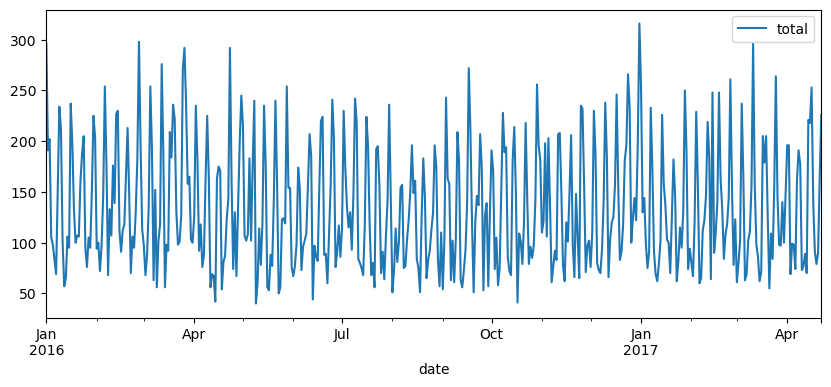

In [195]:
### We are trying to forecast the total number of visitors

df1['total'].plot(legend=True, figsize=(10,4));

### It seems there is some seasonality (weekly seasonality).
### Also, since it is a little bit hard to see when the peak arises, we will further investigate this.

In [196]:
### In the same plot, we will overlay holidays

### We can identify the dates (index) of holidays using the following command

df1.query('holiday==1').index

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

In [197]:
### Alternative:

df1[df['holiday']==1].index

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

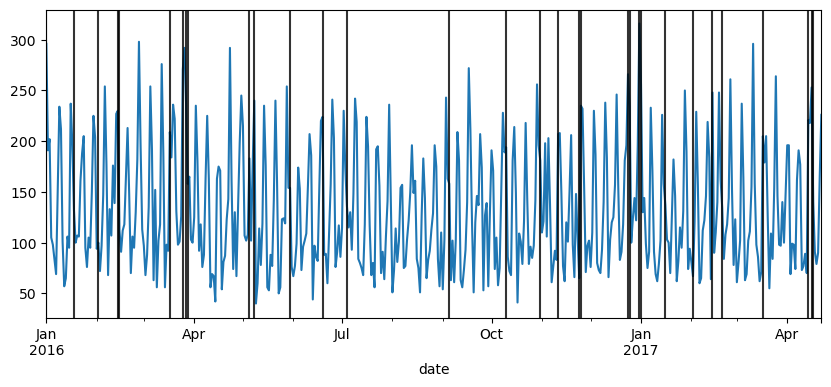

In [198]:
ax = df1['total'].plot(figsize=(10,4))

for day in df1.query('holiday==1').index:
    ax.axvline(x=day, color='black', alpha=0.8); ### We are adding a vertical line when it is a holiday
    

In [199]:
### Still, it is still bit hard to see that we have peaks on holidays, and it is helpful in predicting
### However, intuitively, holidays should matter number of visitors.

### To see some seasonality, we can see the seasonal decomposition.

from statsmodels.tsa.seasonal import seasonal_decompose


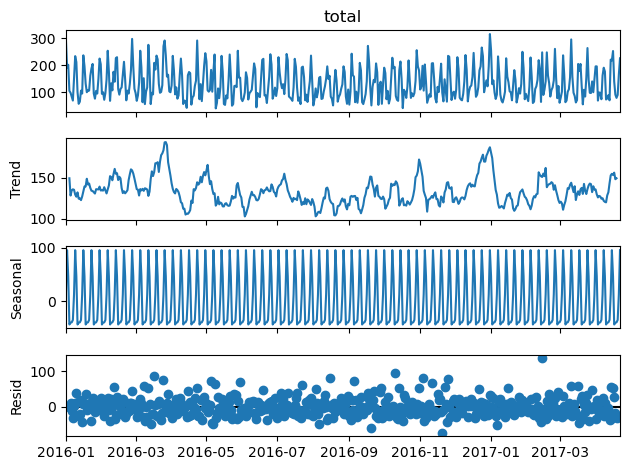

In [200]:
result = seasonal_decompose(df1['total'])
result.plot();

### Trend is not that significant. However, there is a strong seasonality.

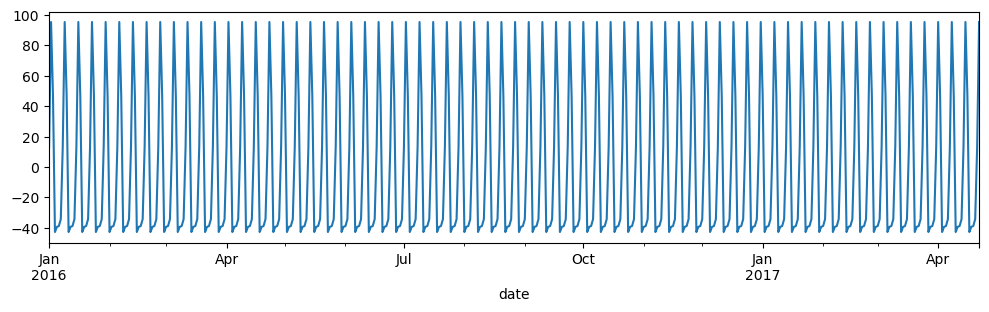

In [201]:
result.seasonal.plot(figsize=(12,3));

In [202]:
### Next Steps

### First fit a seasonal ARIMA model

### Then incorporate the exogenous variable

len(df1)

478

In [203]:
### Create train and test data

train = df1.iloc[:436]
test = df1.iloc[436:]

In [204]:
from pmdarima import auto_arima

In [205]:
auto_arima(df1['total'], seasonal=True, m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2381.680
Date:                   Thu, 06 Nov 2025   AIC                           4771.359
Time:                           17:33:43   BIC                           4788.038
Sample:                       01-01-2016   HQIC                          4777.916
                            - 04-22-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.7538      1.740      2.732      0.006       1.343       8.165
ar.S.L7        0.9661      0.012     77.835      0.000       0.942       0.990
ma.S.L7       -0.7690      0.050    -15.503      0.000      -0.866      -0.672
sigma2      1259.6586     76.252     16.520      0.000    1110.207    1409.110
===================================================================================
Ljung-Box (L1) (Q):                  16.02   Jarque-Bera (JB):                62.03
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             0.74
Prob(H) (two-sided):                  0.31   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [206]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [207]:
### Let's assume the order: (1,0,0)(2,0,0)7

model = SARIMAX(train['total'], order=(1,0,0), seasonal_order=(2,0,0,7),
               enforce_invertibility=False)

### In statsmodels, they may force invertibility by design. Thus, we specify not to force it. 

In [208]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2224.701
Date:                           Thu, 06 Nov 2025   AIC                           4457.403
Time:                                   17:33:44   BIC                           4473.713
Sample:                               01-01-2016   HQIC                          4463.840
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2212      0.047      4.711      0.000       0.129       0.313
ar.S.L7        0.5063      0.036     14.187      0.000       0.436       0.576
ar.S.L14       0.4574      0.037     12.379      0.000       0.385       0.530
sigma2      1520.2899     82.277     18.478      0.000    1359.029    1681.550
===================================================================================
Ljung-Box (L1) (Q):                   0.99   Jarque-Bera (JB):                29.23
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.34
Prob(H) (two-sided):                  0.37   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [209]:
start = len(train)
end = len(train) + len(test) - 1

In [210]:
predictions = results.predict(start,end).rename('SARIMA Model')
predictions.head()

2017-03-12    165.545789
2017-03-13     70.347485
2017-03-14     91.812941
2017-03-15     79.685118
2017-03-16     92.827732
Freq: D, Name: SARIMA Model, dtype: float64

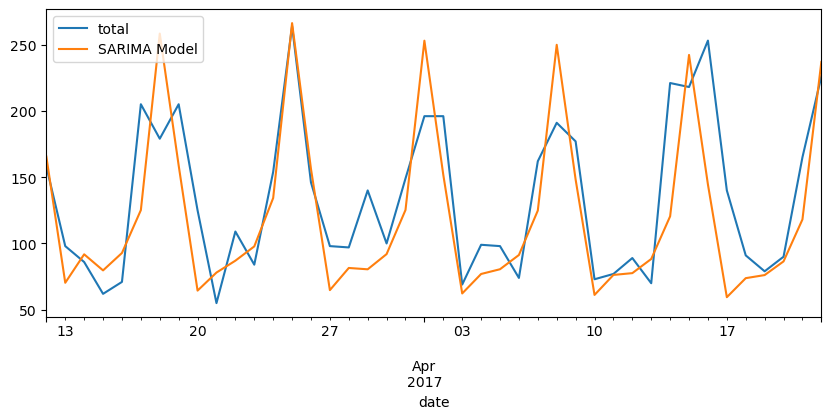

In [211]:
### Plot the predictions

test['total'].plot(legend=True, figsize=(10,4));
predictions.plot(legend=True);

### Predictions are mostly 'ok'.

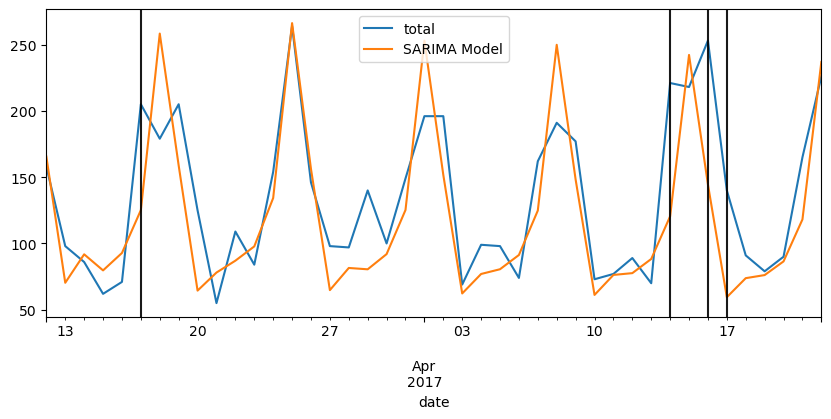

In [212]:
### Now let's see how holidays are affecting these predictions.

ax = test['total'].plot(legend=True, figsize=(10,4));
predictions.plot(legend=True);

for day in test.query('holiday==1').index:
    ax.axvline(x=day, color='black', alpha=0.9);

### Note that we did not incorporate the holiday effect, and peaks align nicely with holidays.

In [213]:
### Let's calculate accuracy

rmse(test['total'], predictions)

41.263154987121844

In [214]:
test['total'].mean()

134.26190476190476

#### SARIMA-Based Models with Exogenous Variables

In statsmodels, it is easy to add exogenous variables. However, it is important to know the future of these variables. Why is this important? Because if we do not know, we may also need to predict them, and in that case, we are predicting two things at once.


In [215]:
### Let's continue the previous example and see if we would be able to get a smaller RMSE when incorporating an exogenous variable.

In [216]:
auto_arima(df1['total'], X=df1[['holiday']], seasonal=True, m=7).summary()

### Note: Model expect exogenous variable(s) to be a dataframe. Thus, we are using two brackets.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  478
Model:             SARIMAX(0, 0, 1)x(2, 0, [], 7)   Log Likelihood               -2348.649
Date:                            Thu, 06 Nov 2025   AIC                           4709.298
Time:                                    17:34:14   BIC                           4734.316
Sample:                                01-01-2016   HQIC                          4719.134
                                     - 04-22-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.5513      4.274      2.703      0.007       3.175      19.928
holiday       74.8253      4.545     16.464      0.000      65.918      83.733
ma.L1          0.1782      0.051      3.474      0.001       0.078       0.279
ar.S.L7        0.5061      0.045     11.235      0.000       0.418       0.594
ar.S.L14       0.3843      0.043      8.983      0.000       0.300       0.468
sigma2      1141.9441     80.182     14.242      0.000     984.790    1299.098
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.78
Prob(Q):                              0.97   Prob(JB):                         0.41
Heteroskedasticity (H):               0.89   Skew:                             0.12
Prob(H) (two-sided):                  0.45   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [217]:
### With the exogenous variable, paramter values change. Let's assume new paramter values are (1,0,1)(1,0,1,7).

In [218]:
### Step 1: Train SARIMAX model

model = SARIMAX(train['total'], exog=train[['holiday']], order=(1,0,1), seasonal_order=(1,0,1,7),
               enforce_invertibility=False)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 7)   Log Likelihood               -2144.589
Date:                           Thu, 06 Nov 2025   AIC                           4301.179
Time:                                   17:34:15   BIC                           4325.644
Sample:                               01-01-2016   HQIC                          4310.834
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       93.1817      2.343     39.762      0.000      88.589      97.775
ar.L1          0.9998      0.000   4733.289      0.000       0.999       1.000
ma.L1         -1.9023      0.124    -15.394      0.000      -2.145      -1.660
ar.S.L7        0.9997      0.001   1484.495      0.000       0.998       1.001
ma.S.L7       -0.9740      0.027    -36.171      0.000      -1.027      -0.921
sigma2       299.4833     31.949      9.374      0.000     236.865     362.102
===================================================================================
Ljung-Box (L1) (Q):                   3.02   Jarque-Bera (JB):                29.64
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                            -0.20
Prob(H) (two-sided):                  0.89   Kurtosis:                         4.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [219]:
### Predictions

start = len(train)
end = len(train) + len(test) - 1

In [220]:
predictions = result.predict(start,end,exog=test[['holiday']]).rename('SARIMAX with Exog')

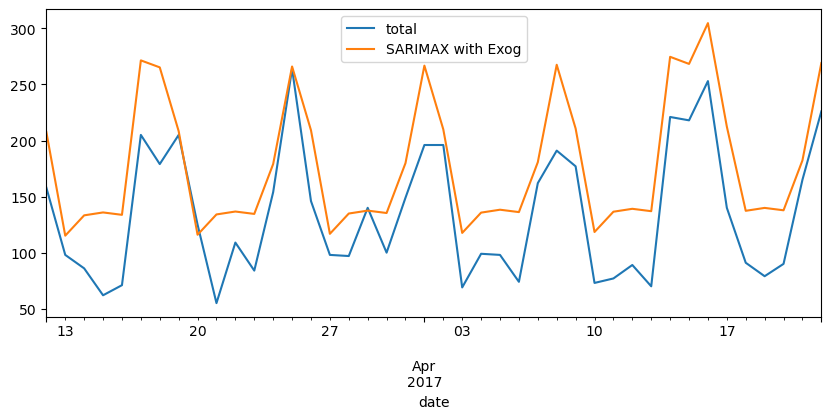

In [221]:
### Plot the predictions

test['total'].plot(legend=True, figsize=(10,4));
predictions.plot(legend=True);

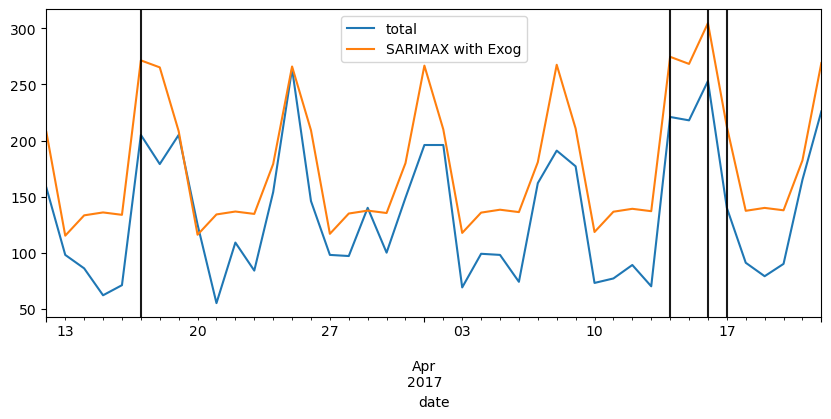

In [222]:
ax = test['total'].plot(legend=True, figsize=(10,4));
predictions.plot(legend=True);

for x in test.query('holiday==1').index:
    ax.axvline(x=x, color='black', alpha=0.9);

### Now the peaks are hit with more accuracy.

In [223]:
### Quantify the accuracy

rmse(test['total'], predictions)

### Note: Try the correct model and compare the performance.

49.401946371673176

In [224]:
### Forecast into the future

In [225]:
model = SARIMAX(df1['total'], exog=df1[['holiday']], order=(1,0,1), seasonal_order=(1,0,1,7),
               enforce_invertibility=False)
results = model.fit()

### When forecasting into the future, we should know future holidays.
### In the original dataset, we had holiday variable values (although the total is missing)

exog_forecast = df[478:][['holiday']] ### Double brackets to make sure it is a dataframe

In [226]:
forecasts = results.predict(len(df1), len(df1)+38, exog = exog_forecast).rename('FINAL SARIMAX FORECAST')

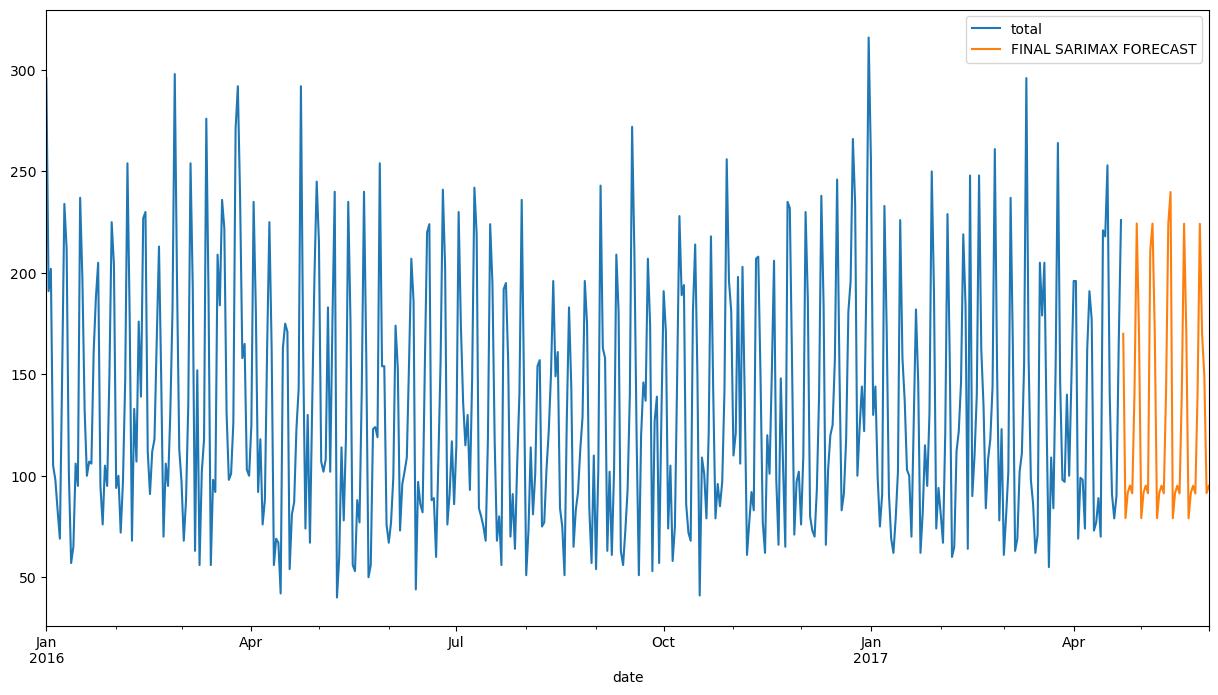

In [227]:
### Plot the data

df1['total'].plot(legend=True, figsize=(15,8));
forecasts.plot(legend=True);

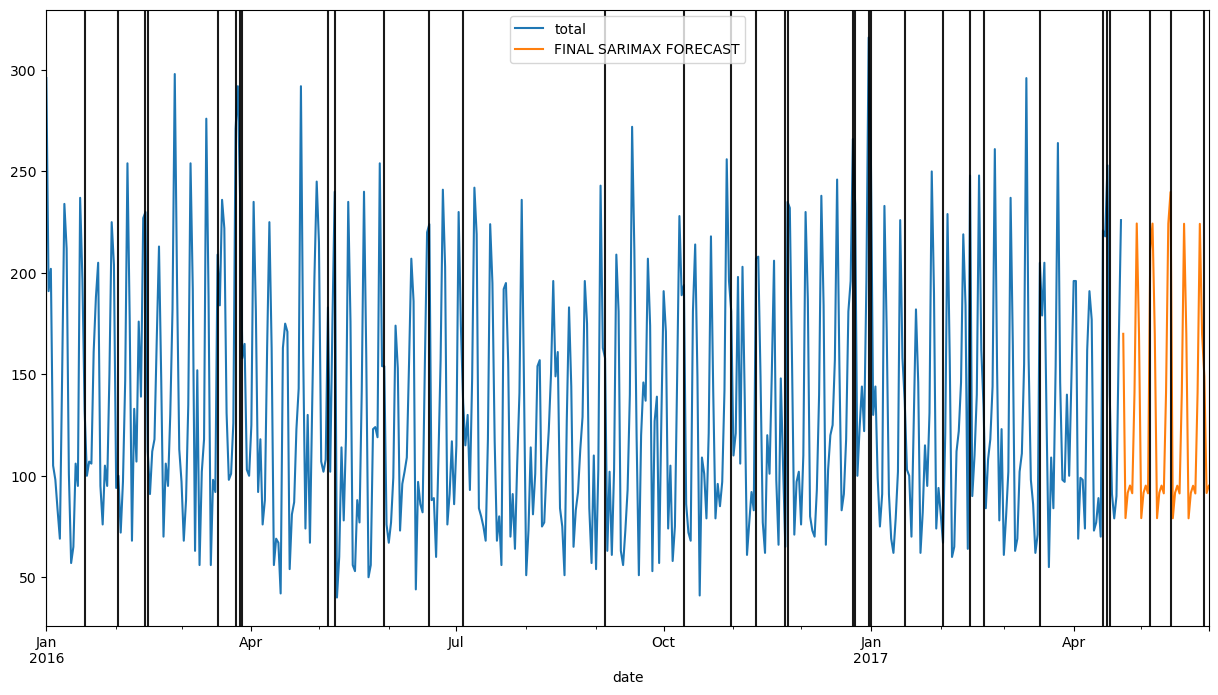

In [228]:
### Let's overlay holiday information

ax = df1['total'].plot(legend=True, figsize=(15,8));
forecasts.plot(legend=True);

for x in df.query('holiday==1').index:
    ax.axvline(x=x, color='black', alpha=0.9);


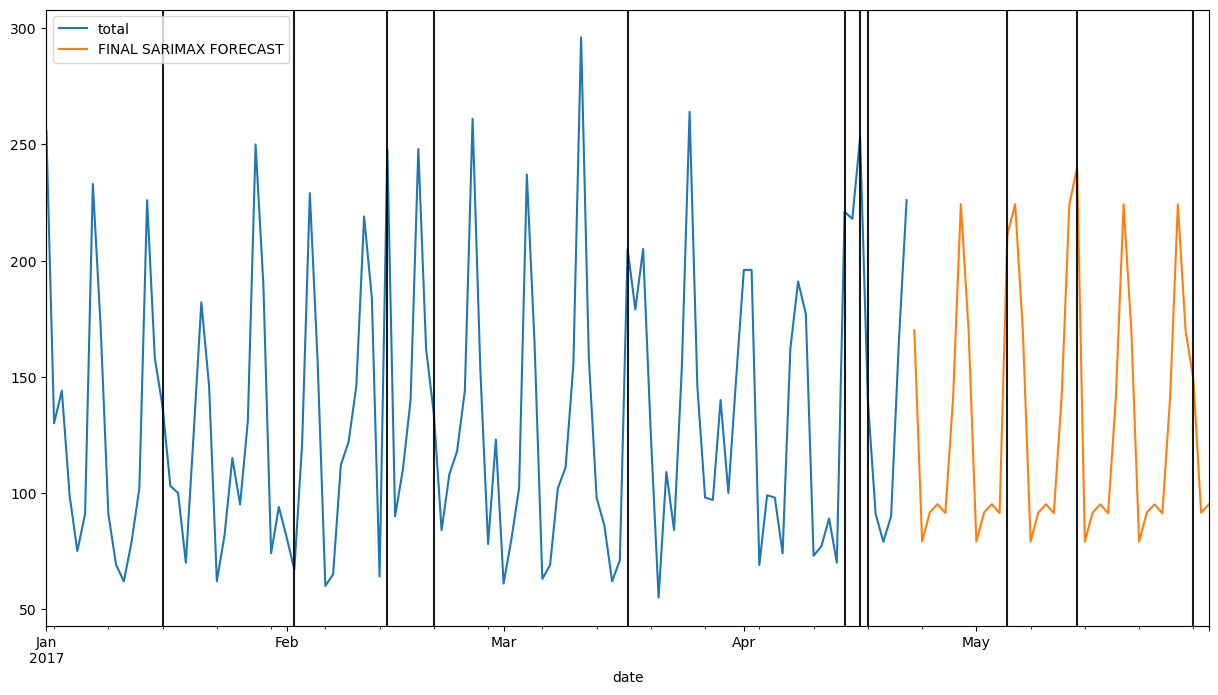

In [229]:
### Zoom into the data from 2017

ax = df1['total'].loc['2017-01-01':].plot(legend=True, figsize=(15,8));
forecasts.plot(legend=True);

for x in df.query('holiday==1').index:
    ax.axvline(x=x, color='black', alpha=0.9);

#### Vector AutoRegression (VAR) Model

In the previous case, the forecast variable (number of visitors) was influenced by the exogenous variable (holiday). However, not vice versa.

There are some situations where variables affect each other. Then the question is what kind of model we would be able to use in such a case.

All variables in a VAR enter the model in the same way. Each variable has an equation explaining its evolution based on its own lagged values, the lagged values of the other model's variables, and an error term. Due to this, we do not require that much knowledge about forces influencing a variable. The only prior knowledge is the list of variables.

Example: Changes in personal consumption expenditures based on changes in personal disposable income.

A k-dimensional VAR model of order $p$, denoted VAR(p), considers each variable $y_{k}$ in the system.

Steps for building a VAR Model:
1. Examine the data (understand interdependency)
2. Visualize the data
3. Test for stationarity
4. Select appropriate order p
5. Initiate the model and fit to training data
6. If necessary, invert the transformation (for stationarity)
7. Evaluate the model predictions
8. Forecast the future


In [230]:
### Forecast into the future using two time series (which affect each other)

### Variables: How much was spent and how much money have)

### pyramid Auto Arima is not capable of doing a grid search to determine the optimal order (p) for the VAR model.
### However, we can try different p values and determine the optimal based on AIC.
### In order to avoid overfitting, we are looking at a significant drop in the AIC value.
### Note: In order to have the same number of rows, both variables are differencing the same amount.


In [231]:
### Load forecasting tools

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

In [232]:
### Load Data (1)

df = pd.read_csv('Chapter_6_M2SLMoneyStock.csv', index_col='Date', parse_dates=True)
df.index.freq = 'MS'
df.head()

,Money
Date,
1995-01-01,3492.4
1995-02-01,3489.9
1995-03-01,3491.1
1995-04-01,3499.2
1995-05-01,3524.2


In [233]:
### Load Data (2)

sp = pd.read_csv('Chapter_6_PCEPersonalSpending.csv', index_col='Date', parse_dates=True)
sp.index.freq = 'MS'
sp.head()

,Spending
Date,
1995-01-01,4851.2
1995-02-01,4850.8
1995-03-01,4885.4
1995-04-01,4890.2
1995-05-01,4933.1


In [234]:
### Combine these two datasets into one dataset

df = df.join(sp) ### Make the combination permanent by replacing the original dataset
df.head()

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1


In [235]:
### Drop NA values

df = df.dropna()

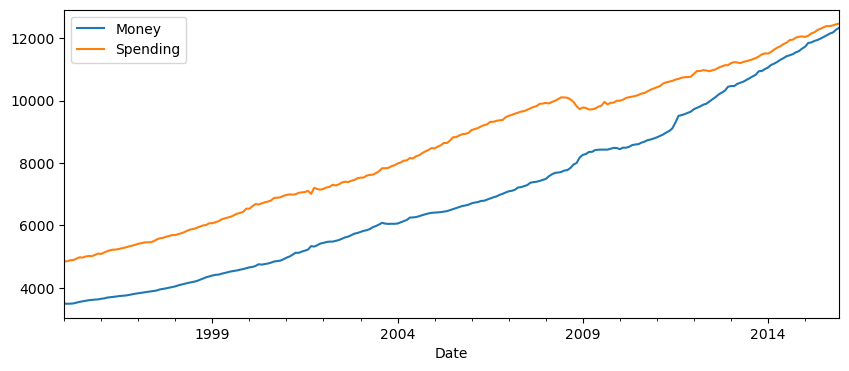

In [236]:
### Plot the data

df.plot(figsize=(10,4));

In [237]:
### Test for stationarity (Use adf_test functions)

adf_test(df['Money'])

### Variable "Money" is nonstationary

Augmented Dickey-Fuller Test: 
ADF test statistic        4.239022
p-value                   1.000000
# lags used               4.000000
# observations          247.000000
critical value (1%)      -3.457105
critical value (5%)      -2.873314
critical value (10%)     -2.573044
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [238]:
adf_test(df['Spending'])

### Variable "Spending" is nonstationary

Augmented Dickey-Fuller Test: 
ADF test statistic        0.149796
p-value                   0.969301
# lags used               3.000000
# observations          248.000000
critical value (1%)      -3.456996
critical value (5%)      -2.873266
critical value (10%)     -2.573019
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [239]:
### To make them stationary, we try differencing. First try first order differencing.

### We can try 'diff' from statsmodels. However, we can also use a pandas function for dataframes.

df_transformed = df.diff()
df_transformed.head()


,Money,Spending
Date,,
1995-01-01,NaN,NaN
1995-02-01,-2.5,-0.4
1995-03-01,1.2,34.6
1995-04-01,8.1,4.8
1995-05-01,25.0,42.9


In [240]:
### Check Stationarity

adf_test(df_transformed['Money'])

### Still not stationary

Augmented Dickey-Fuller Test: 
ADF test statistic       -2.057404
p-value                   0.261984
# lags used              15.000000
# observations          235.000000
critical value (1%)      -3.458487
critical value (5%)      -2.873919
critical value (10%)     -2.573367
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [241]:
adf_test(df_transformed['Spending'])

### Spending is now stationary

Augmented Dickey-Fuller Test: 
ADF test statistic     -7.226974e+00
p-value                 2.041027e-10
# lags used             2.000000e+00
# observations          2.480000e+02
critical value (1%)    -3.456996e+00
critical value (5%)    -2.873266e+00
critical value (10%)   -2.573019e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [242]:
### We need to differencing the "Money" variable again. Since we need to have the same number of rows for both variables, we apply it to both.

df_transformed = df_transformed.diff().dropna()
df_transformed.head()


,Money,Spending
Date,,
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7


In [243]:
adf_test(df_transformed['Money'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -7.077471e+00
p-value                 4.760675e-10
# lags used             1.400000e+01
# observations          2.350000e+02
critical value (1%)    -3.458487e+00
critical value (5%)    -2.873919e+00
critical value (10%)   -2.573367e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [244]:
adf_test(df_transformed['Spending'])

### Both variablles are now stationary

Augmented Dickey-Fuller Test: 
ADF test statistic     -8.760145e+00
p-value                 2.687900e-14
# lags used             8.000000e+00
# observations          2.410000e+02
critical value (1%)    -3.457779e+00
critical value (5%)    -2.873609e+00
critical value (10%)   -2.573202e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [245]:
df_transformed.shape

(250, 2)

In [246]:
### Let's say we want to forecast for 12 months

### Number of observations
nobs = 12

In [247]:
train = df_transformed[:-nobs] ### start = Beginning of the dataframe, and then go to -12 from the end.

test = df_transformed[-nobs:] ### Start -12 from the end, and then go to the end

In [248]:
### Choose the order for VAR

### Perform a grid search for order "p"

model = VAR(train)

for p in [1,2,3,4,5,6,7]: ## Alternative: range(8)
    result = model.fit(p)
    print(f'ORDER {p}')
    print(f'AIC: {result.aic}')
    print('\n')

### Based on the results, order 5 has the minimum AIC

ORDER 1
AIC: 14.178610495220896


ORDER 2
AIC: 13.955189367163703


ORDER 3
AIC: 13.849518291541038


ORDER 4
AIC: 13.827950574458281


ORDER 5
AIC: 13.78730034460964


ORDER 6
AIC: 13.799076756885809


ORDER 7
AIC: 13.797638727913972




In [249]:
results = model.fit(5)
results.summary()

### Note, we have parameter values for both equations (equation for Money and equation for Spending)

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 06, Nov, 2025
Time:                     17:34:20
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.1131
Nobs:                     233.000    HQIC:                   13.9187
Log likelihood:          -2245.45    FPE:                    972321.
AIC:                      13.7873    Det(Omega_mle):         886628.
--------------------------------------------------------------------
Results for equation Money
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.516683         1.782238            0.290           0.772
L1.Money           -0.646232         0.068177           -9.479           0.000
L1.Spending        -0.107411         0.051388           -2.090      

In [250]:
### Obtain Forecasts for next 12 months

### It is a bit complicated, as we need to pass the corresponding lag value (here 5) before the test set starts

### Grab 5 lagged values, right before the test starts.
### Numpy array

lagged_values = train.values[-5:]

In [251]:
### Forecast results

z = results.forecast(y=lagged_values, steps=12)
z

array([[-16.99527634,  36.14982003],
       [ -3.17403756, -11.45029844],
       [ -0.377725  ,  -6.68496939],
       [ -2.60223305,   5.47945777],
       [  4.228557  ,  -2.44336505],
       [  1.55939341,   0.38763902],
       [ -0.99841027,   3.88368011],
       [  0.36451042,  -2.3561014 ],
       [ -1.21062726,  -1.22414652],
       [  0.22587712,   0.786927  ],
       [  1.33893884,   0.18097449],
       [ -0.21858453,   0.21275046]])

In [252]:
### Convert forecasts into a dataframe

idx = pd.date_range('2015-01-01', periods=12, freq='MS')
idx

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [253]:
df_forecast = pd.DataFrame(data=z, index=idx, columns=['Money_2d','Spending_2d'])
df_forecast


,Money_2d,Spending_2d
2015-01-01,-16.995276,36.149820
2015-02-01,-3.174038,-11.450298
2015-03-01,-0.377725,-6.684969
2015-04-01,-2.602233,5.479458
2015-05-01,4.228557,-2.443365
2015-06-01,1.559393,0.387639
2015-07-01,-0.998410,3.883680
2015-08-01,0.364510,-2.356101
2015-09-01,-1.210627,-1.224147
2015-10-01,0.225877,0.786927


In [254]:
### Note that the values we see here are with second differencing.
### We have to reverse the first and second differences before comparing against the actual values

# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Money1d'] = (df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2]) + df_forecast['Money_2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['MoneyForecast'] = df['Money'].iloc[-nobs-1] + df_forecast['Money1d'].cumsum()

In [255]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Spending1d'] = (df['Spending'].iloc[-nobs-1]-df['Spending'].iloc[-nobs-2]) + df_forecast['Spending_2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['SpendingForecast'] = df['Spending'].iloc[-nobs-1] + df_forecast['Spending1d'].cumsum()

In [256]:
df_forecast.head()

,Money_2d,Spending_2d,Money1d,MoneyForecast,Spending1d,SpendingForecast
2015-01-01,-16.995276,36.149820,61.604724,11731.704724,46.749820,12108.749820
2015-02-01,-3.174038,-11.450298,58.430686,11790.135410,35.299522,12144.049342
2015-03-01,-0.377725,-6.684969,58.052961,11848.188371,28.614552,12172.663894
2015-04-01,-2.602233,5.479458,55.450728,11903.639099,34.094010,12206.757904
2015-05-01,4.228557,-2.443365,59.679285,11963.318384,31.650645,12238.408549


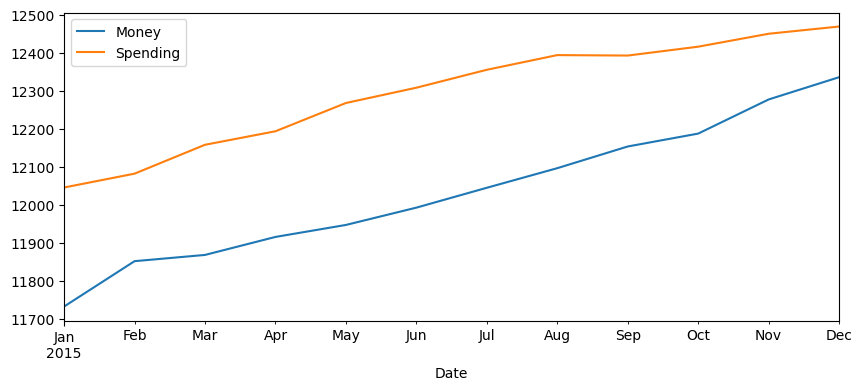

In [257]:
### Let's plot the values

test_range = df[-nobs:]

test_range.plot(figsize=(10,4));

In [258]:
df_forecast.columns

Index(['Money_2d', 'Spending_2d', 'Money1d', 'MoneyForecast', 'Spending1d',
       'SpendingForecast'],
      dtype='object')

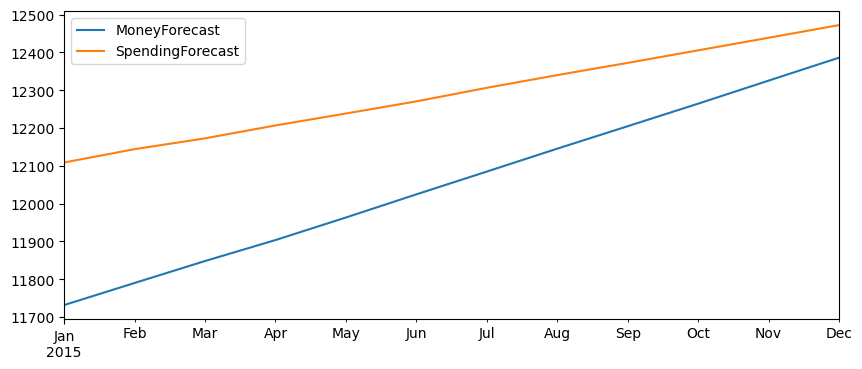

In [259]:
df_forecast[['MoneyForecast', 'SpendingForecast']].plot(figsize=(10,4));

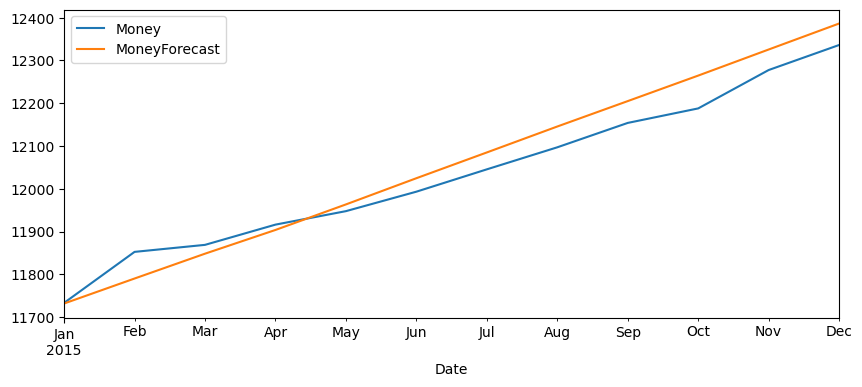

In [260]:
test_range['Money'].plot(figsize=(10,4), legend=True);
df_forecast['MoneyForecast'].plot(legend=True);

### Money forecasts are pretty close.

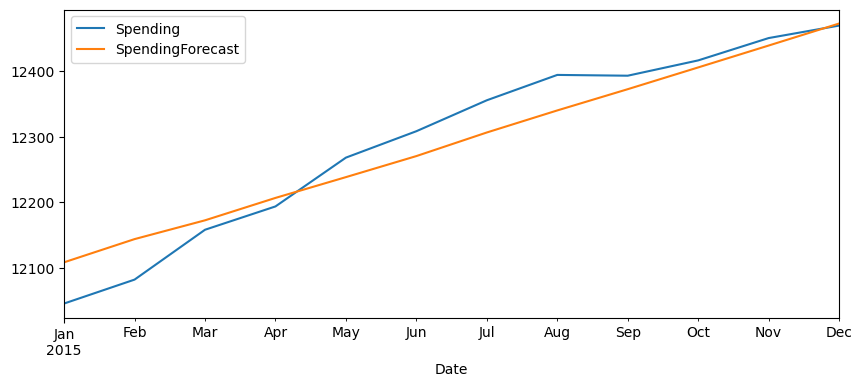

In [261]:
test_range['Spending'].plot(figsize=(10,4), legend=True);
df_forecast['SpendingForecast'].plot(legend=True);


In [262]:
rmse(test_range['Money'], df_forecast['MoneyForecast'])

43.71049653558893

In [263]:
test_range['Money'].mean()

### Compared to the test mean, RMSE is not too bad.

12034.008333333333

In [264]:
rmse(test_range['Spending'], df_forecast['SpendingForecast'])

37.00117516940808

In [265]:
test_range['Spending'].mean()

### Compared to the test mean, RMSE is not too bad.

12294.533333333335

#### VARMA (Vector AutoRegression Moving Average) Models

It is an extension of the VAR model with moving average terms. 
This can be viewed with the ARMA model, and extending it to multiple variables (system of equations).

In order to determine the order, we can use auto_arima.


In [266]:
### Load specific forecasting tools

from statsmodels.tsa.statespace.varmax import VARMAX, VARMAXResults
from pmdarima import auto_arima

### For VARMA, the first part of the analysis is very similar to the analysis for VAR

In [267]:
auto_arima(df['Money'],maxiter=100).summary ### maximum interations = 1000

<bound method ARIMA.summary of ARIMA(maxiter=100, order=(1, 2, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)>

In [268]:
auto_arima(df['Spending'], maxiter=1000).summary

<bound method ARIMA.summary of ARIMA(maxiter=1000, order=(1, 1, 2), scoring_args={}, suppress_warnings=True)>

In [269]:
### Based on auto_arima VARMA(p=1,q=2) is recommended.

### Note that d=2 for Money. Thus, we have to take second order differencing to make it stationary.

df_transformed = df.diff().diff()
df_transformed = df_transformed.dropna()
df_transformed.head()

,Money,Spending
Date,,
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7


In [270]:
### Train and Test Datasests

nobs=12
train, test = df_transformed[0:-nobs], df_transformed[-nobs:]

In [271]:
### Fit VARMA(1,2) Model

model = VARMAX(train, order=(1,2), trend='c') ### 'c' refers to constant linear trend
results = model.fit(maxiter=1000, disp=False) ### "disp=False" hides the messages when fitting the model
results.summary()

Dep. Variable:,"['Money', 'Spending']",No. Observations:,238
Model:,"VARMA(1,2)",Log Likelihood,-2285.945
,+ intercept,AIC,4605.889
Date:,"Thu, 06 Nov 2025",BIC,4664.918
Time:,17:34:51,HQIC,4629.679
Sample:,03-01-1995,,
,- 12-01-2014,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"0.43, 0.00",Jarque-Bera (JB):,"561.86, 128.19"
Prob(Q):,"0.51, 0.95",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"5.63, 2.87",Skew:,"1.35, -0.34"


In [272]:
### Predict the next 12 values

### Note: Unlike VAR model, foreast() will provide an extended DateTime index for VARMAX

df_forecast = results.forecast(12)
df_forecast

,Money,Spending
2015-01-01,-12.188497,37.812384
2015-02-01,-11.080352,-5.298553
2015-03-01,1.629703,0.021474
2015-04-01,-1.804911,-0.506932
2015-05-01,1.198552,0.360535
2015-06-01,-0.502553,-0.074926
2015-07-01,0.588415,0.216230
2015-08-01,-0.084132,0.038973
2015-09-01,0.335567,0.150026
2015-10-01,0.074652,0.081072


In [273]:
### Invert the transformation

# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Money1d'] = (df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2]) + df_forecast['Money'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['MoneyForecast'] = df['Money'].iloc[-nobs-1] + df_forecast['Money'].cumsum()

# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Spending1d'] = (df['Spending'].iloc[-nobs-1]-df['Spending'].iloc[-nobs-2]) + df_forecast['Spending'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['SpendingForecast'] = df['Spending'].iloc[-nobs-1] + df_forecast['Spending'].cumsum()

In [274]:
df_forecast.head()

,Money,Spending,Money1d,MoneyForecast,Spending1d,SpendingForecast
2015-01-01,-12.188497,37.812384,66.411503,11657.911503,48.412384,12099.812384
2015-02-01,-11.080352,-5.298553,55.331152,11646.831152,43.113831,12094.513831
2015-03-01,1.629703,0.021474,56.960855,11648.460855,43.135306,12094.535306
2015-04-01,-1.804911,-0.506932,55.155944,11646.655944,42.628373,12094.028373
2015-05-01,1.198552,0.360535,56.354495,11647.854495,42.988908,12094.388908


In [275]:
### Concatinate the forecast with observed data

pd.concat([df.iloc[-12:],df_forecast[['MoneyForecast','SpendingForecast']]],axis=1).head()

,Money,Spending,MoneyForecast,SpendingForecast
2015-01-01,11733.2,12046.0,11657.911503,12099.812384
2015-02-01,11852.4,12082.4,11646.831152,12094.513831
2015-03-01,11868.8,12158.3,11648.460855,12094.535306
2015-04-01,11916.1,12193.8,11646.655944,12094.028373
2015-05-01,11947.6,12268.1,11647.854495,12094.388908


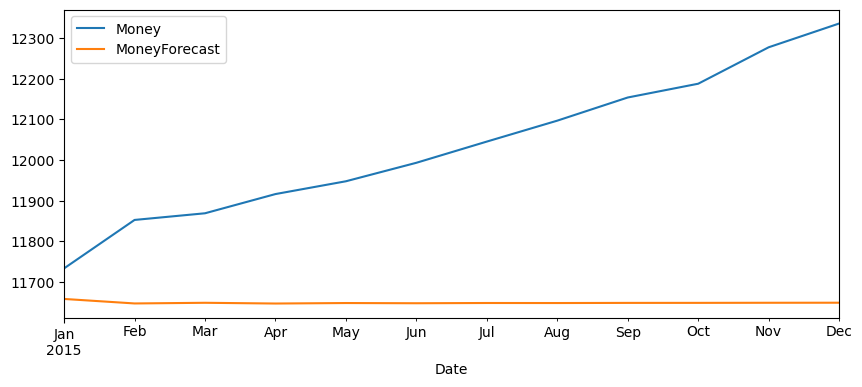

In [276]:
### Plot the Results

df['Money'][-nobs:].plot(figsize=(10,4),legend=True).autoscale(axis='x',tight=True)
df_forecast['MoneyForecast'].plot(legend=True);

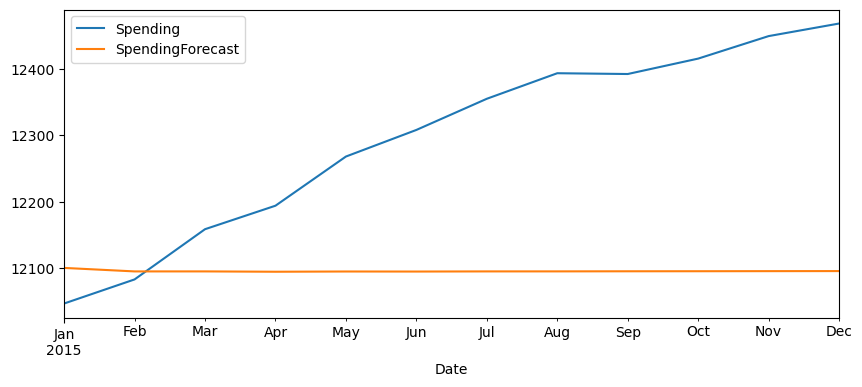

In [277]:
df['Spending'][-nobs:].plot(figsize=(10,4),legend=True).autoscale(axis='x',tight=True)
df_forecast['SpendingForecast'].plot(legend=True);

In [278]:
### Note: VARMA model does not perform well as VAR model. However, similar to VAR model we can compare RMSE.
### May be a simple model (ARMA) may perform well here.